In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install required dependecies

In [42]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [43]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/FNB_FirstRand/FNB_Fraud_Case_Study_Dataset.csv')

Display basic information

In [44]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (10000, 25)

First few rows:


,transaction_id,user_id,amount,transaction_channel,merchant,device_id,card_type,country,timestamp,prev_timestamp,lat,lon,prev_lat,prev_lon,time_since_last_tx,distance_from_last_tx,km_per_min,device_change,velocity_last_10min,is_night,merchant_risk_score,account_age_days,prior_chargebacks,high_risk_country,is_fraud
0,1,U0328,194.88,in-store,DesignerHub,DV0013,debit,ZA,2025-01-01 01:16:15,2025-01-01 00:00:00,-22.988850,26.496871,-25.254599,29.408572,4575,388.030491,5.088924,1,9,1,1,704,0,0,0
1,2,U0072,450.62,online,Supermart,DV0045,prepaid,ZA,2025-01-01 01:57:10,2025-01-01 01:16:15,-24.439300,27.422112,-22.988850,26.496871,2455,186.300192,4.553162,0,8,1,1,902,0,0,0
2,3,U0048,47.97,card-not-present,DesignerHub,DV0120,virtual,KE,2025-01-01 02:55:11,2025-01-01 01:57:10,-0.904823,36.634389,-24.439300,27.422112,3481,2786.633412,48.031601,0,1,1,2,166,0,0,0
3,4,U0367,299.68,card-not-present,ShoeWorld,DV0113,prepaid,UK,2025-01-01 03:10:09,2025-01-01 02:55:11,52.144534,0.247320,-0.904823,36.634389,898,6793.310565,453.896029,0,8,1,1,1841,0,0,0
4,5,U0415,116.58,airtime,ShoeWorld,DV0082,prepaid,ZA,2025-01-01 04:09:50,2025-01-01 03:10:09,-19.131131,27.266937,52.144534,0.247320,3581,8319.755133,139.398299,0,8,1,1,934,0,0,0


Initial Data Overview

In [45]:
# Get detailed information about the dataset
print("=== DATASET INFORMATION ===\n")
df.info()

print("\n=== STATISTICAL SUMMARY ===\n")
df.describe()

=== DATASET INFORMATION ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  int64  
 1   user_id                10000 non-null  object 
 2   amount                 10000 non-null  float64
 3   transaction_channel    10000 non-null  object 
 4   merchant               9926 non-null   object 
 5   device_id              10000 non-null  object 
 6   card_type              10000 non-null  object 
 7   country                10000 non-null  object 
 8   timestamp              10000 non-null  object 
 9   prev_timestamp         10000 non-null  object 
 10  lat                    10000 non-null  float64
 11  lon                    10000 non-null  float64
 12  prev_lat               10000 non-null  float64
 13  prev_lon               10000 non-null  float64
 14  time_since_last_tx     100

,transaction_id,amount,lat,lon,prev_lat,prev_lon,time_since_last_tx,distance_from_last_tx,km_per_min,device_change,velocity_last_10min,is_night,merchant_risk_score,account_age_days,prior_chargebacks,high_risk_country,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4190.842079,8.274571,15.933277,8.515883,16.117718,2512.393100,3949.482647,256.833864,0.106000,4.646000,0.248600,1.409900,1010.276700,0.102200,0.250100,0.050000
std,2886.89568,62322.363182,29.725948,18.757361,27.599997,15.215178,1430.982248,2744.490203,807.153283,0.307853,3.055031,0.432223,0.667028,575.517062,0.318379,0.433092,0.217956
min,1.00000,-50.000000,-198.717406,-191.241239,-28.995308,-0.499471,21.000000,0.612645,0.007753,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,2500.75000,77.745000,-19.071888,0.481389,-19.022788,0.491329,1270.000000,2231.877049,41.624847,0.000000,2.000000,0.000000,1.000000,508.000000,0.000000,0.000000,0.000000
50%,5000.50000,139.450000,6.209957,4.187400,6.211547,4.189806,2513.500000,3831.771130,92.542923,0.000000,5.000000,0.000000,1.000000,1012.000000,0.000000,0.000000,0.000000
75%,7500.25000,248.147500,51.312312,29.948225,51.311930,29.874835,3758.000000,5091.727692,189.214047,0.000000,7.000000,0.000000,2.000000,1515.000000,0.000000,1.000000,0.000000
max,10000.00000,999999.000000,191.614393,198.096229,52.299124,37.599805,4999.000000,9417.758488,19364.660862,1.000000,19.000000,1.000000,3.000000,1999.000000,3.000000,1.000000,1.000000


#STEP 1: DATA PREPARATION

Check Missing Values

✓ All libraries imported successfully!
=== MISSING VALUES ===

          Missing Count  Percentage
merchant             74        0.74


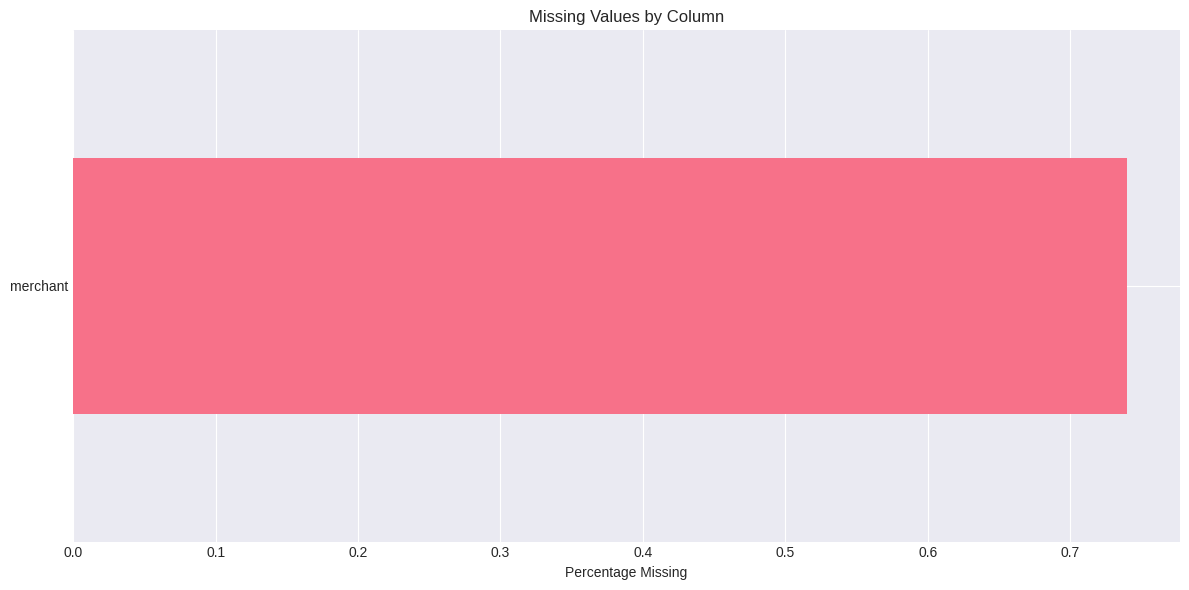

In [46]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

# Check for missing values
print("=== MISSING VALUES ===\n")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})

print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count')['Percentage'].plot(kind='barh')
plt.xlabel('Percentage Missing')
plt.title('Missing Values by Column')
plt.tight_layout()
plt.show()

Handle Missing Values

In [47]:
# Fill missing values strategically
# Numeric columns - fill with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical columns - fill with mode or 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown', inplace=True)

print("✓ Missing values handled!")
print("\nRemaining missing values:", df.isnull().sum().sum())

✓ Missing values handled!

Remaining missing values: 0


In [48]:
#Import misssing dependencies
import warnings
warnings.filterwarnings('ignore')

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


Convert Data Types

In [49]:
# Convert timestamp columns to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['prev_timestamp'] = pd.to_datetime(df['prev_timestamp'])

print("✓ Timestamp columns converted to datetime format")
print("\nData types after conversion:")
print(df[['timestamp', 'prev_timestamp']].dtypes)

✓ Timestamp columns converted to datetime format

Data types after conversion:
timestamp         datetime64[ns]
prev_timestamp    datetime64[ns]
dtype: object


Check for Duplicates

In [50]:
# Check for duplicate transactions
duplicates = df.duplicated(subset=['transaction_id']).sum()
print(f"Duplicate transaction_ids: {duplicates}")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

if duplicates == 0 and duplicate_rows == 0:
    print("\n✓ No duplicates found!")

Duplicate transaction_ids: 0
Duplicate rows: 0

✓ No duplicates found!


Check Fraud Distribution

In [51]:
# Check the distribution of fraud vs non-fraud
fraud_counts = df['is_fraud'].value_counts()
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100

print("Fraud Distribution:")
print("=" * 80)
print(f"Non-Fraud (0): {fraud_counts[0]} ({fraud_percentage[0]:.2f}%)")
print(f"Fraud (1): {fraud_counts[1]} ({fraud_percentage[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: 1:{fraud_counts[0]/fraud_counts[1]:.2f}")

Fraud Distribution:
Non-Fraud (0): 9500 (95.00%)
Fraud (1): 500 (5.00%)

Class Imbalance Ratio: 1:19.00


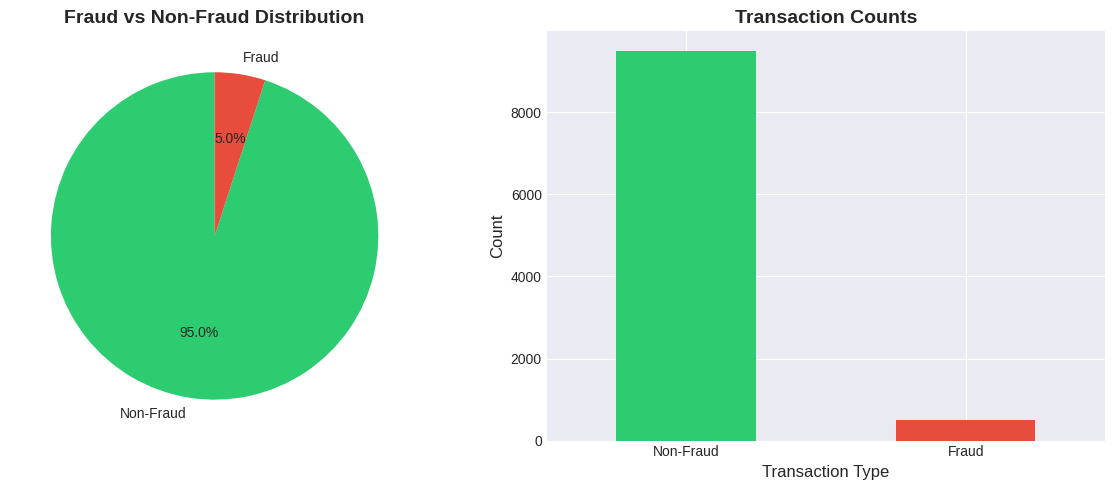

In [52]:
# Visualize fraud distribution
plt.figure(figsize=(12, 5))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%',
        colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Fraud vs Non-Fraud Distribution', fontsize=14, fontweight='bold')

# Bar chart
plt.subplot(1, 2, 2)
fraud_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Transaction Counts', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)

plt.tight_layout()
plt.show()

#Step 2: Explore the Data

Transaction Amount Analysis

In [53]:
# Analyze transaction amounts
print("Transaction Amount Statistics:")
print("=" * 80)
print(df.groupby('is_fraud')['amount'].describe())

Transaction Amount Statistics:
           count         mean           std   min      25%     50%      75%  \
is_fraud                                                                      
0         9500.0  3971.389614  61434.095587 -50.0  76.8275  137.56  242.790   
1          500.0  8360.438920  77240.772852 -50.0  99.3150  201.87  773.735   

               max  
is_fraud            
0         999999.0  
1         999999.0  


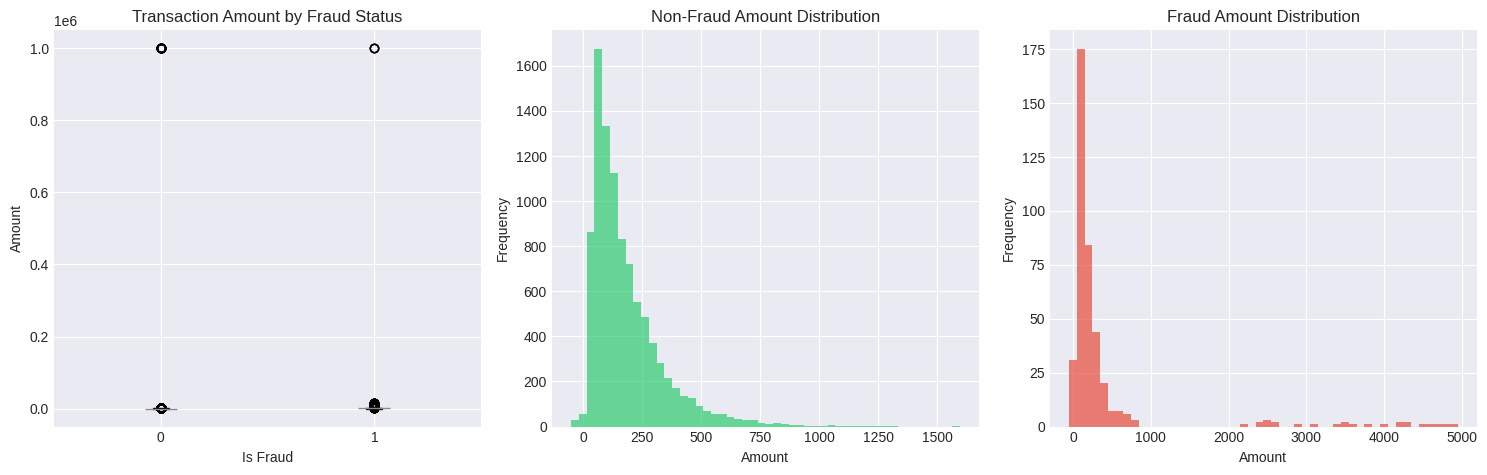

In [54]:
# Visualize transaction amounts
plt.figure(figsize=(15, 5))

# Box plot
plt.subplot(1, 3, 1)
df.boxplot(column='amount', by='is_fraud', ax=plt.gca())
plt.title('Transaction Amount by Fraud Status')
plt.suptitle('')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

# Distribution for non-fraud (excluding extreme outliers for better visualization)
plt.subplot(1, 3, 2)
non_fraud_amounts = df[df['is_fraud'] == 0]['amount']
non_fraud_amounts[non_fraud_amounts < 5000].hist(bins=50, color='#2ecc71', alpha=0.7)
plt.title('Non-Fraud Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Distribution for fraud
plt.subplot(1, 3, 3)
fraud_amounts = df[df['is_fraud'] == 1]['amount']
fraud_amounts[fraud_amounts < 5000].hist(bins=50, color='#e74c3c', alpha=0.7)
plt.title('Fraud Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Transaction Channel Analysis

In [55]:
# Analyze transaction channels
channel_fraud = pd.crosstab(df['transaction_channel'], df['is_fraud'], normalize='index') * 100
channel_counts = df['transaction_channel'].value_counts()

print("Transaction Channel Analysis:")
print("=" * 80)
print("\nTransaction counts by channel:")
print(channel_counts)
print("\nFraud percentage by channel:")
print(channel_fraud)

Transaction Channel Analysis:

Transaction counts by channel:
transaction_channel
card-present        2096
airtime             2011
in-store            2004
card-not-present    1957
online              1932
Name: count, dtype: int64

Fraud percentage by channel:
is_fraud                     0         1
transaction_channel                     
airtime              94.629538  5.370462
card-not-present     94.890138  5.109862
card-present         95.133588  4.866412
in-store             94.810379  5.189621
online               95.548654  4.451346


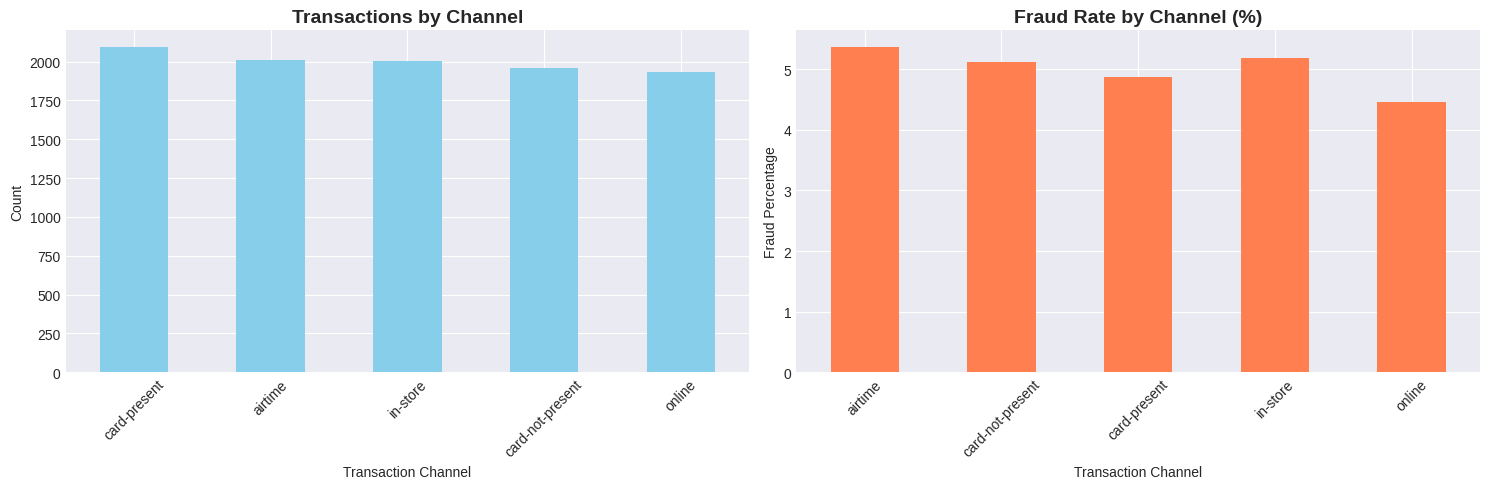

In [56]:
# Visualize transaction channels
plt.figure(figsize=(15, 5))

# Channel counts
plt.subplot(1, 2, 1)
channel_counts.plot(kind='bar', color='skyblue')
plt.title('Transactions by Channel', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Fraud rate by channel
plt.subplot(1, 2, 2)
channel_fraud[1].plot(kind='bar', color='coral')
plt.title('Fraud Rate by Channel (%)', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Channel')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Country Analysis

In [57]:
# Analyze countries
country_fraud = pd.crosstab(df['country'], df['is_fraud'], normalize='index') * 100
country_counts = df['country'].value_counts()

print("Country Analysis:")
print("=" * 80)
print("\nTransaction counts by country:")
print(country_counts)
print("\nFraud percentage by country:")
print(country_fraud)

Country Analysis:

Transaction counts by country:
country
UK    2523
ZA    2511
NG    2501
KE    2465
Name: count, dtype: int64

Fraud percentage by country:
is_fraud          0         1
country                      
KE        94.320487  5.679513
NG        94.322271  5.677729
UK        95.679746  4.320254
ZA        95.659100  4.340900


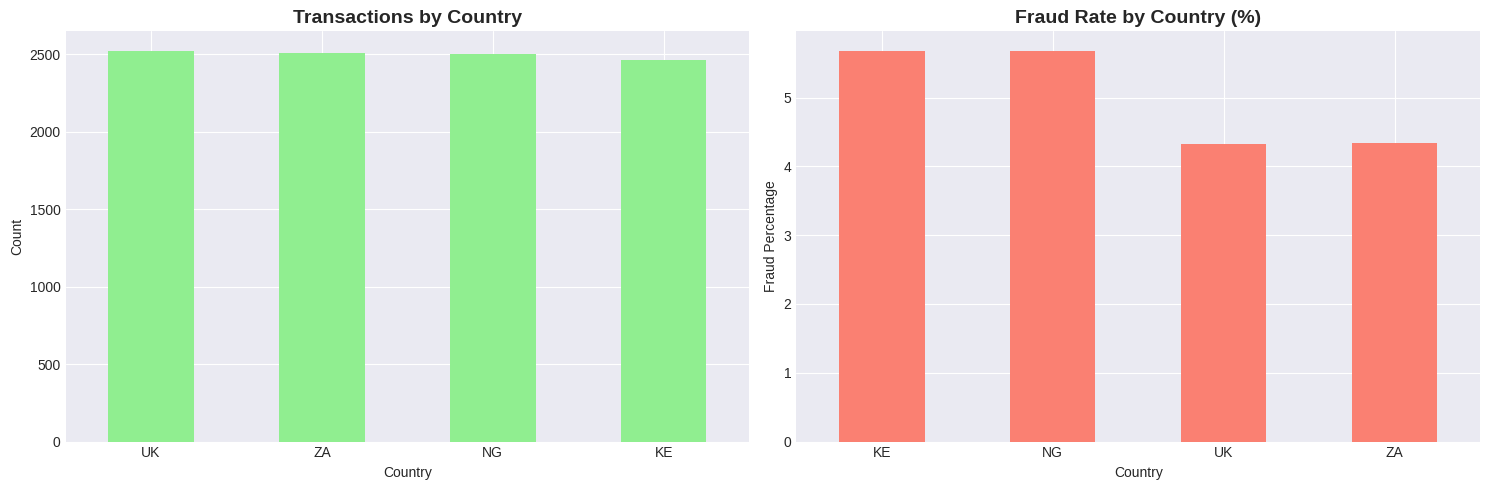

In [58]:
# Visualize country data
plt.figure(figsize=(15, 5))

# Country counts
plt.subplot(1, 2, 1)
country_counts.plot(kind='bar', color='lightgreen')
plt.title('Transactions by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Fraud rate by country
plt.subplot(1, 2, 2)
country_fraud[1].plot(kind='bar', color='salmon')
plt.title('Fraud Rate by Country (%)', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Merchant Analysis

In [59]:
# Analyze merchants (top 10)
merchant_counts = df['merchant'].value_counts().head(10)
top_merchants = merchant_counts.index.tolist()
merchant_fraud = df[df['merchant'].isin(top_merchants)].groupby('merchant')['is_fraud'].mean() * 100

print("Top 10 Merchants by Transaction Volume:")
print("=" * 80)
print(merchant_counts)
print("\nFraud rate for top merchants:")
print(merchant_fraud.sort_values(ascending=False))

Top 10 Merchants by Transaction Volume:
merchant
QuickBuy        863
EasyPay         785
LuxuryHub       783
Supermart       781
Takealot        776
Walmart         765
GameStore       762
ElectroWorld    753
Airtel          749
DesignerHub     749
Name: count, dtype: int64

Fraud rate for top merchants:
merchant
QuickBuy        5.909618
GameStore       5.905512
LuxuryHub       5.747126
Supermart       5.505762
Takealot        5.283505
Airtel          4.806409
ElectroWorld    4.648074
Walmart         4.575163
DesignerHub     4.272363
EasyPay         2.929936
Name: is_fraud, dtype: float64


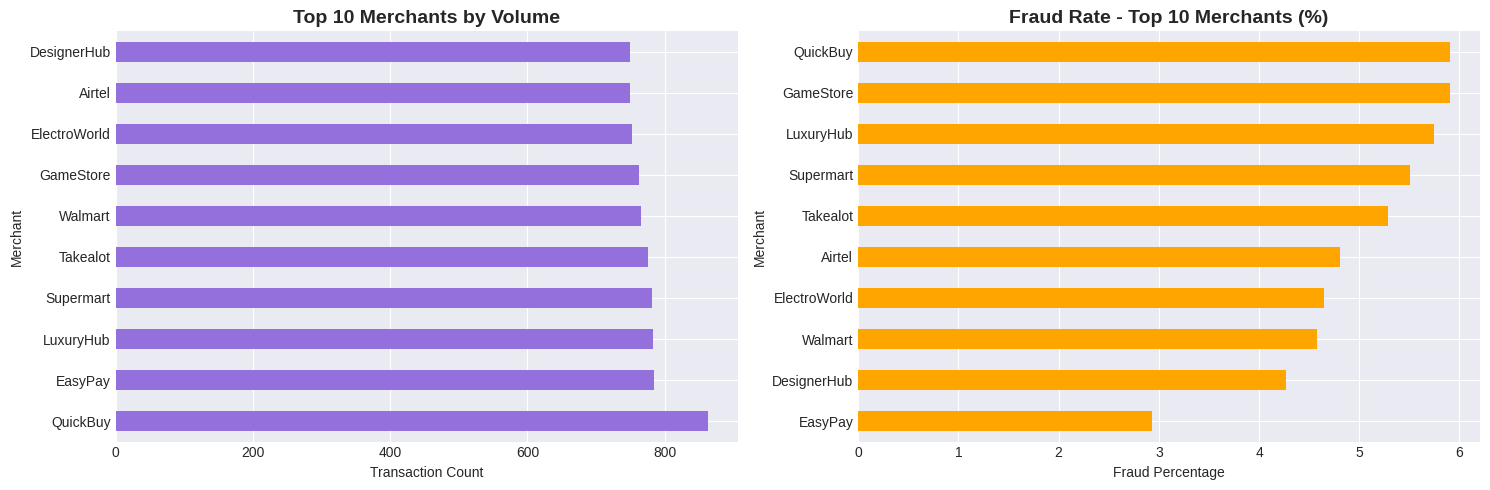

In [60]:
# Visualize merchant data
plt.figure(figsize=(15, 5))

# Top merchants by volume
plt.subplot(1, 2, 1)
merchant_counts.plot(kind='barh', color='mediumpurple')
plt.title('Top 10 Merchants by Volume', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Count')
plt.ylabel('Merchant')

# Fraud rate for top merchants
plt.subplot(1, 2, 2)
merchant_fraud.sort_values().plot(kind='barh', color='orange')
plt.title('Fraud Rate - Top 10 Merchants (%)', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Percentage')
plt.ylabel('Merchant')

plt.tight_layout()
plt.show()

Card Type Analysis

In [61]:
# Analyze card types
card_fraud = pd.crosstab(df['card_type'], df['is_fraud'], normalize='index') * 100
card_counts = df['card_type'].value_counts()

print("Card Type Analysis:")
print("=" * 80)
print("\nTransaction counts by card type:")
print(card_counts)
print("\nFraud percentage by card type:")
print(card_fraud)

Card Type Analysis:

Transaction counts by card type:
card_type
prepaid    2583
debit      2531
virtual    2476
credit     2410
Name: count, dtype: int64

Fraud percentage by card type:
is_fraud           0         1
card_type                     
credit     94.605809  5.394191
debit      95.298301  4.701699
prepaid    94.967093  5.032907
virtual    95.113086  4.886914


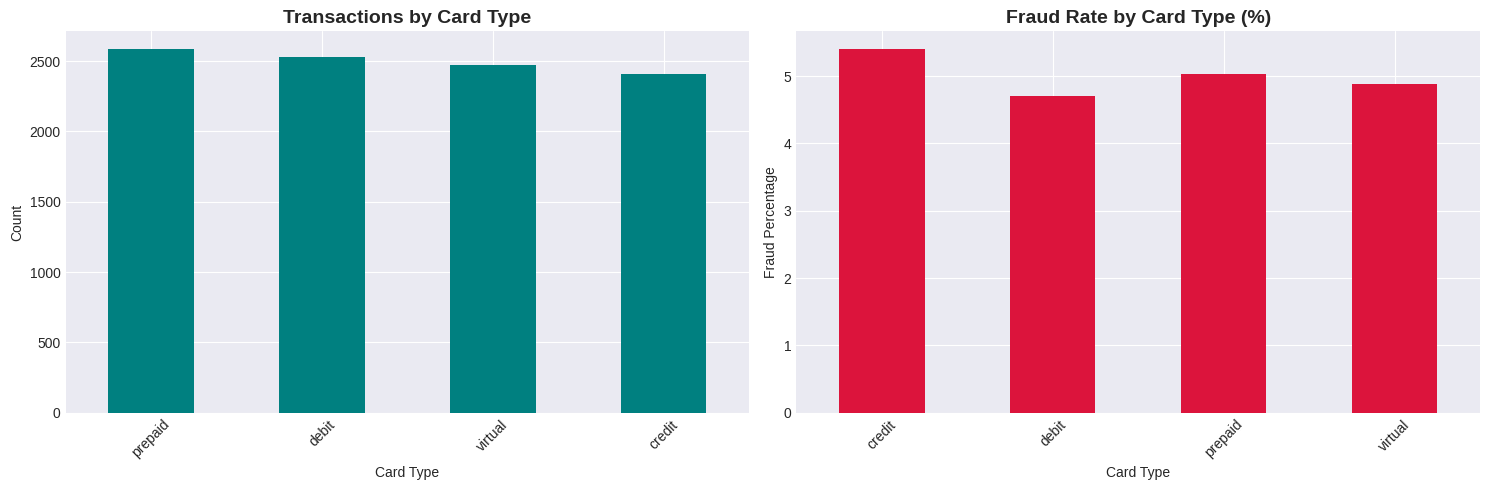

In [62]:
# Visualize card type data
plt.figure(figsize=(15, 5))

# Card type counts
plt.subplot(1, 2, 1)
card_counts.plot(kind='bar', color='teal')
plt.title('Transactions by Card Type', fontsize=14, fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Fraud rate by card type
plt.subplot(1, 2, 2)
card_fraud[1].plot(kind='bar', color='crimson')
plt.title('Fraud Rate by Card Type (%)', fontsize=14, fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Distance and Velocity Analysis

In [63]:
# Analyze distance and velocity patterns
print("Distance and Velocity Statistics by Fraud Status:")
print("=" * 80)
print("\nDistance from last transaction:")
print(df.groupby('is_fraud')['distance_from_last_tx'].describe())
print("\nKm per minute (travel speed):")
print(df.groupby('is_fraud')['km_per_min'].describe())

Distance and Velocity Statistics by Fraud Status:

Distance from last transaction:
           count         mean          std       min          25%  \
is_fraud                                                            
0         9500.0  3968.257939  2758.417350  0.612645  2257.742992   
1          500.0  3592.752087  2440.118342  2.729531  1729.744776   

                  50%          75%          max  
is_fraud                                         
0         3833.581005  5108.167793  9417.758488  
1         3778.863155  4961.043899  9200.851382  

Km per minute (travel speed):
           count        mean         std       min        25%        50%  \
is_fraud                                                                   
0         9500.0  257.510434  811.519536  0.007753  41.068209  92.523282   
1          500.0  243.979051  719.784425  0.132287  46.108145  94.022390   

                 75%           max  
is_fraud                            
0         190.923597  19364.66

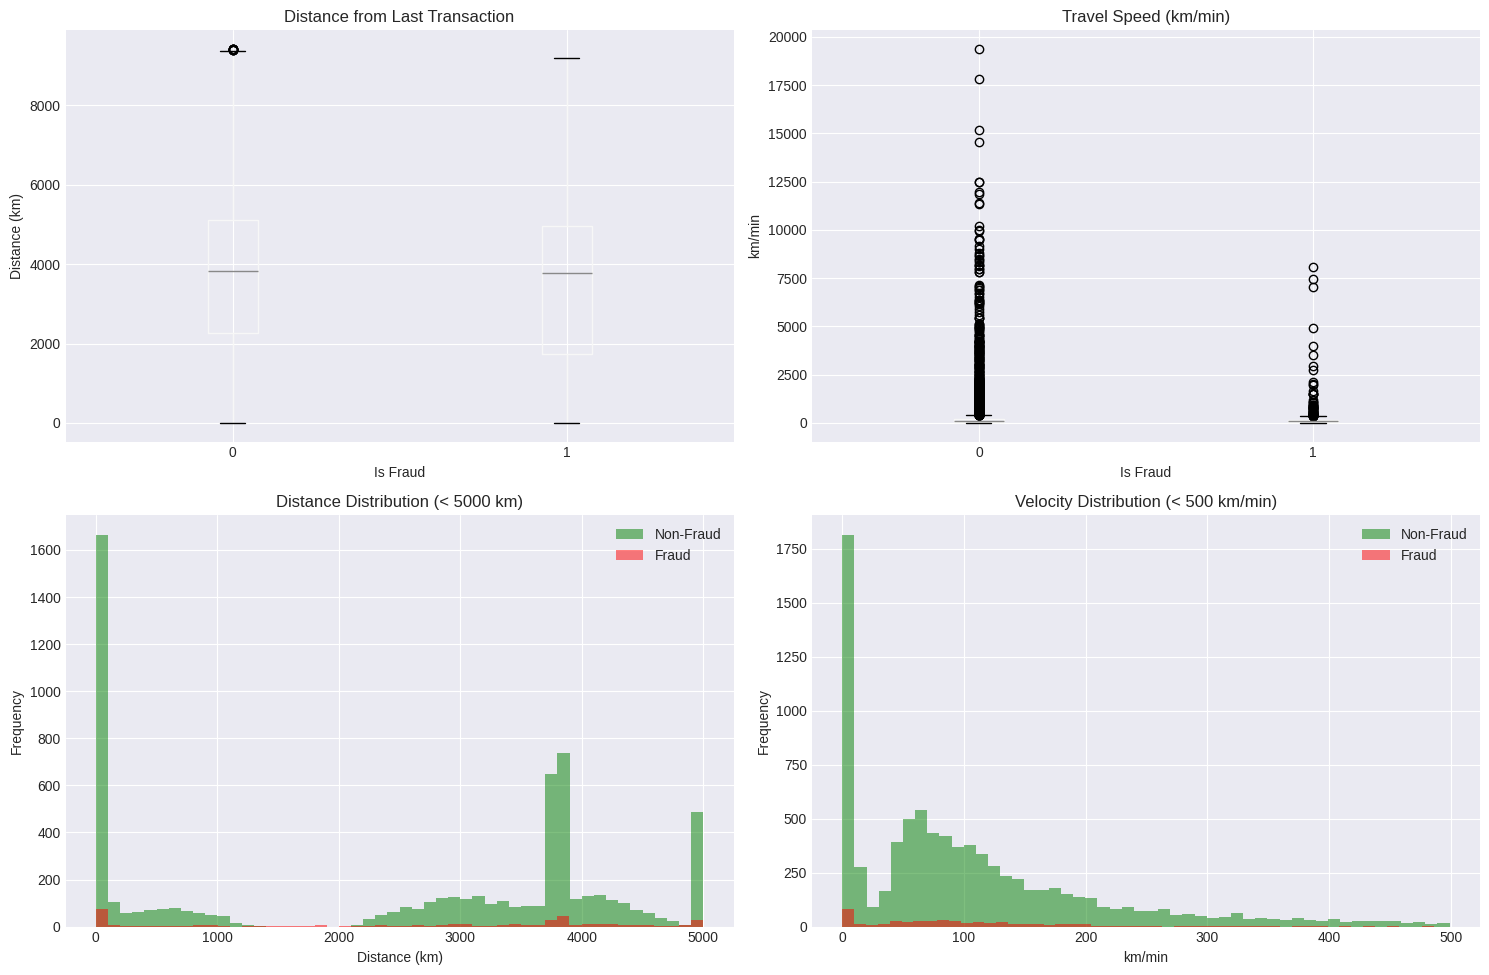

In [64]:
# Visualize distance and velocity
plt.figure(figsize=(15, 10))

# Distance box plot
plt.subplot(2, 2, 1)
df.boxplot(column='distance_from_last_tx', by='is_fraud', ax=plt.gca())
plt.title('Distance from Last Transaction')
plt.suptitle('')
plt.xlabel('Is Fraud')
plt.ylabel('Distance (km)')

# Velocity box plot
plt.subplot(2, 2, 2)
df.boxplot(column='km_per_min', by='is_fraud', ax=plt.gca())
plt.title('Travel Speed (km/min)')
plt.suptitle('')
plt.xlabel('Is Fraud')
plt.ylabel('km/min')

# Distance histogram (capped for visibility)
plt.subplot(2, 2, 3)
df[df['is_fraud']==0]['distance_from_last_tx'][df[df['is_fraud']==0]['distance_from_last_tx'] < 5000].hist(bins=50, alpha=0.5, label='Non-Fraud', color='green')
df[df['is_fraud']==1]['distance_from_last_tx'][df[df['is_fraud']==1]['distance_from_last_tx'] < 5000].hist(bins=50, alpha=0.5, label='Fraud', color='red')
plt.title('Distance Distribution (< 5000 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.legend()

# Velocity histogram (capped for visibility)
plt.subplot(2, 2, 4)
df[df['is_fraud']==0]['km_per_min'][df[df['is_fraud']==0]['km_per_min'] < 500].hist(bins=50, alpha=0.5, label='Non-Fraud', color='green')
df[df['is_fraud']==1]['km_per_min'][df[df['is_fraud']==1]['km_per_min'] < 500].hist(bins=50, alpha=0.5, label='Fraud', color='red')
plt.title('Velocity Distribution (< 500 km/min)')
plt.xlabel('km/min')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

 Device Change Analysis

In [65]:
# Analyze device changes
device_change_fraud = pd.crosstab(df['device_change'], df['is_fraud'], normalize='index') * 100

print("Device Change Analysis:")
print("=" * 80)
print(device_change_fraud)
print("\nDevice changes occurred in:", df['device_change'].sum(), "transactions")

Device Change Analysis:
is_fraud               0          1
device_change                      
0              96.275168   3.724832
1              84.245283  15.754717

Device changes occurred in: 1060 transactions


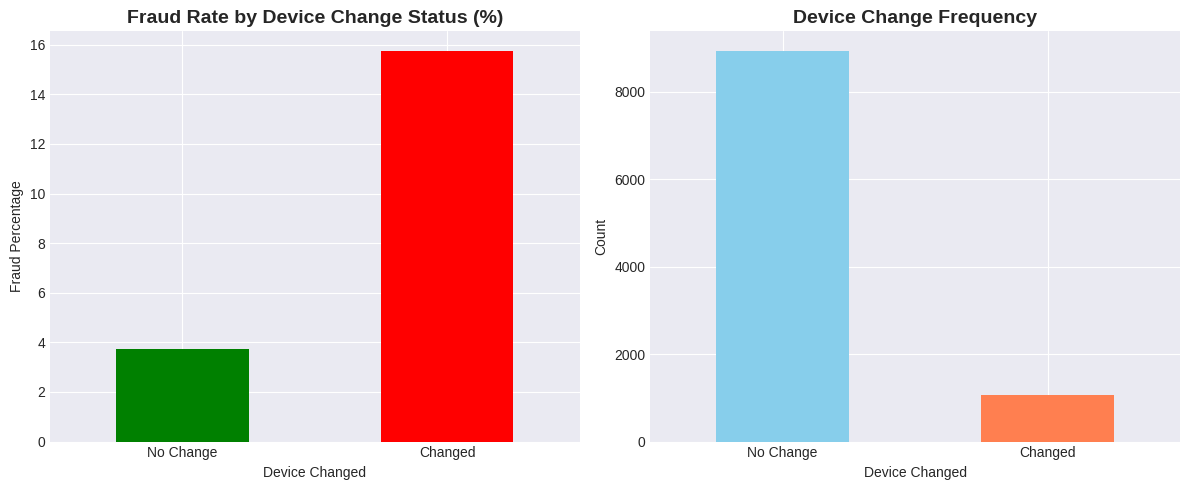

In [66]:
# Visualize device change impact
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
device_change_fraud[1].plot(kind='bar', color=['green', 'red'])
plt.title('Fraud Rate by Device Change Status (%)', fontsize=14, fontweight='bold')
plt.xlabel('Device Changed')
plt.ylabel('Fraud Percentage')
plt.xticks([0, 1], ['No Change', 'Changed'], rotation=0)

plt.subplot(1, 2, 2)
df['device_change'].value_counts().plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Device Change Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Device Changed')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Change', 'Changed'], rotation=0)

plt.tight_layout()
plt.show()

Risk Score Analysis

In [67]:
# Analyze merchant risk scores
risk_fraud = pd.crosstab(df['merchant_risk_score'], df['is_fraud'], normalize='index') * 100

print("Merchant Risk Score Analysis:")
print("=" * 80)
print(risk_fraud)

Merchant Risk Score Analysis:
is_fraud                     0         1
merchant_risk_score                     
1                    95.271833  4.728167
2                    94.586757  5.413243
3                    93.990148  6.009852


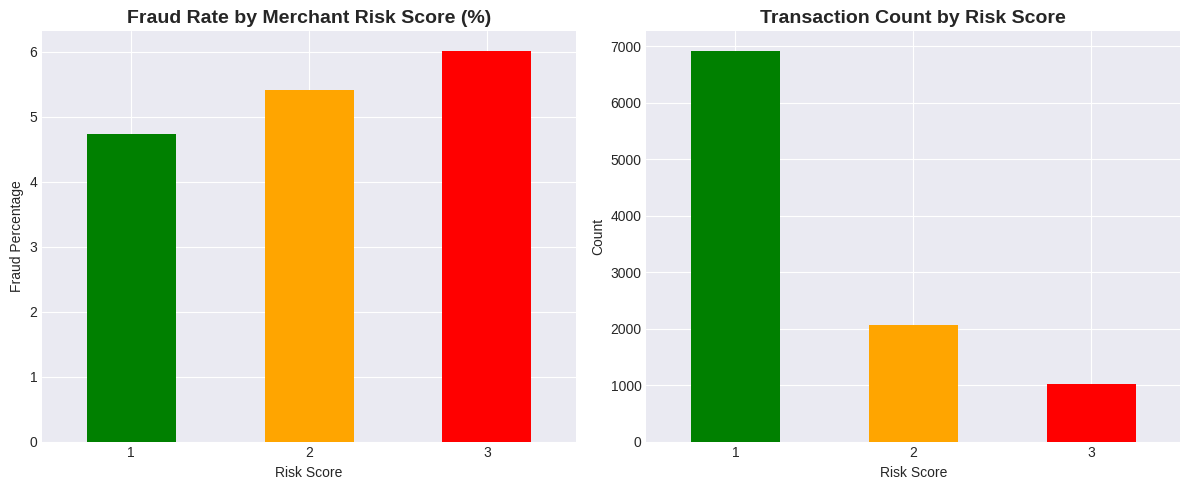

In [68]:
# Visualize risk scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
risk_fraud[1].plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Fraud Rate by Merchant Risk Score (%)', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['merchant_risk_score'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Transaction Count by Risk Score', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

 Correlation Analysis

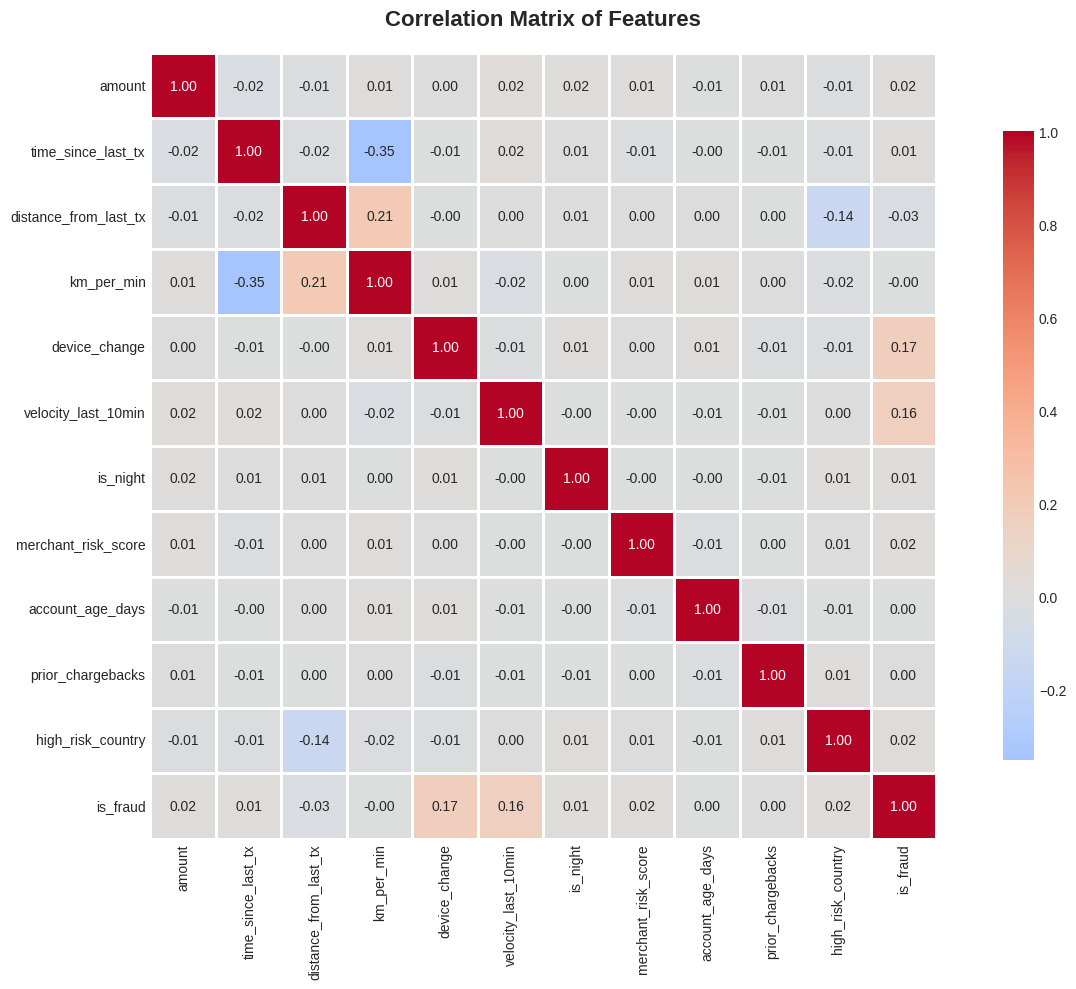


Features Most Correlated with Fraud:
is_fraud                 1.000000
device_change            0.169917
velocity_last_10min      0.162062
merchant_risk_score      0.019984
high_risk_country        0.017958
amount                   0.015350
time_since_last_tx       0.013702
is_night                 0.009236
prior_chargebacks        0.002738
account_age_days         0.000605
km_per_min              -0.003654
distance_from_last_tx   -0.029821
Name: is_fraud, dtype: float64


In [69]:
# Select numerical columns for correlation
numerical_cols = ['amount', 'time_since_last_tx', 'distance_from_last_tx', 'km_per_min',
                  'device_change', 'velocity_last_10min', 'is_night', 'merchant_risk_score',
                  'account_age_days', 'prior_chargebacks', 'high_risk_country', 'is_fraud']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show features most correlated with fraud
print("\nFeatures Most Correlated with Fraud:")
print("=" * 80)
fraud_correlations = correlation_matrix['is_fraud'].sort_values(ascending=False)
print(fraud_correlations)

Risk Score Analysis

In [70]:
# Analyze merchant risk scores
risk_fraud = pd.crosstab(df['merchant_risk_score'], df['is_fraud'], normalize='index') * 100

print("Merchant Risk Score Analysis:")
print("=" * 80)
print(risk_fraud)

Merchant Risk Score Analysis:
is_fraud                     0         1
merchant_risk_score                     
1                    95.271833  4.728167
2                    94.586757  5.413243
3                    93.990148  6.009852


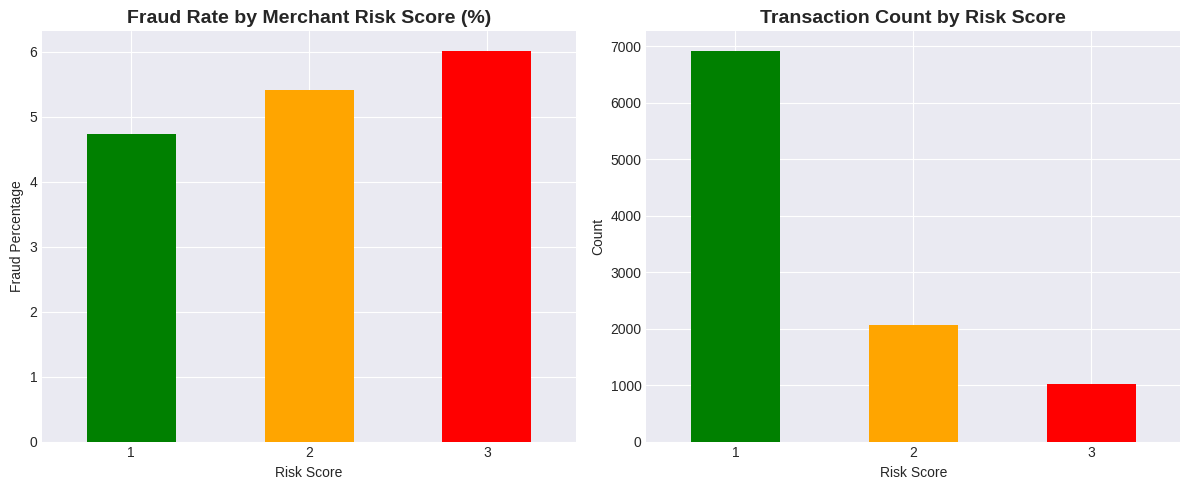

In [71]:
# Visualize risk scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
risk_fraud[1].plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Fraud Rate by Merchant Risk Score (%)', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['merchant_risk_score'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Transaction Count by Risk Score', fontsize=14, fontweight='bold')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

 # Step 3: Feature Engineering

Create New Time-Based Features

In [72]:
# Extract additional time features
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['day_of_month'] = df['timestamp'].dt.day
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

print("✓ Time-based features created:")
print("  - hour (already created)")
print("  - day_of_week")
print("  - day_of_month")
print("  - is_weekend")

✓ Time-based features created:
  - hour (already created)
  - day_of_week
  - day_of_month
  - is_weekend


Create Risk Flags

In [73]:
# Create high-risk transaction flags

# High amount flag (transactions > 95th percentile)
amount_threshold = df['amount'].quantile(0.95)
df['high_amount'] = (df['amount'] > amount_threshold).astype(int)

# Rapid transaction flag (very short time since last transaction)
df['rapid_transaction'] = (df['time_since_last_tx'] < 300).astype(int)  # < 5 minutes

# Impossible travel flag (unrealistic speed)
df['impossible_travel'] = (df['km_per_min'] > 100).astype(int)  # > 6000 km/h

# High velocity flag
df['high_velocity'] = (df['velocity_last_10min'] > 5).astype(int)

# Multiple risk factors flag
df['multiple_risk_factors'] = (
    df['device_change'] +
    df['is_night'] +
    df['high_risk_country'] +
    df['high_amount']
)

print("✓ Risk flags created:")
print(f"  - high_amount: {df['high_amount'].sum()} transactions")
print(f"  - rapid_transaction: {df['rapid_transaction'].sum()} transactions")
print(f"  - impossible_travel: {df['impossible_travel'].sum()} transactions")
print(f"  - high_velocity: {df['high_velocity'].sum()} transactions")
print(f"  - multiple_risk_factors: distribution")
print(df['multiple_risk_factors'].value_counts().sort_index())

✓ Risk flags created:
  - high_amount: 500 transactions
  - rapid_transaction: 534 transactions
  - impossible_travel: 4728 transactions
  - high_velocity: 4098 transactions
  - multiple_risk_factors: distribution
multiple_risk_factors
0    4796
1    3967
2    1134
3     100
4       3
Name: count, dtype: int64


Encode Categorical Variables

In [74]:
# Create a copy for encoding
df_encoded = df.copy()

# Label encode categorical variables
label_encoders = {}
categorical_cols = ['transaction_channel', 'card_type', 'country']

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}: {len(le.classes_)} unique values")

print("\n✓ All categorical variables encoded successfully!")

✓ Encoded transaction_channel: 5 unique values
✓ Encoded card_type: 4 unique values
✓ Encoded country: 4 unique values

✓ All categorical variables encoded successfully!


Select Features for Modeling

In [75]:
# Define feature columns for modeling
feature_columns = [
    # Encoded categorical features
    'transaction_channel_encoded',
    'card_type_encoded',
    'country_encoded',

    # Numerical features
    'amount',
    'time_since_last_tx',
    'distance_from_last_tx',
    'km_per_min',
    'velocity_last_10min',
    'merchant_risk_score',
    'account_age_days',
    'prior_chargebacks',

    # Binary flags
    'device_change',
    'is_night',
    'high_risk_country',
    'is_weekend',

    # Engineered features
    'high_amount',
    'rapid_transaction',
    'impossible_travel',
    'high_velocity',
    'multiple_risk_factors',
    'hour',
    'day_of_week'
]

print(f"Selected {len(feature_columns)} features for modeling:")
print("=" * 80)
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")

Selected 22 features for modeling:
 1. transaction_channel_encoded
 2. card_type_encoded
 3. country_encoded
 4. amount
 5. time_since_last_tx
 6. distance_from_last_tx
 7. km_per_min
 8. velocity_last_10min
 9. merchant_risk_score
10. account_age_days
11. prior_chargebacks
12. device_change
13. is_night
14. high_risk_country
15. is_weekend
16. high_amount
17. rapid_transaction
18. impossible_travel
19. high_velocity
20. multiple_risk_factors
21. hour
22. day_of_week


# Step 4: Build Machine Learning Models

 Prepare Training and test sets

In [80]:
# =============================================================================
# STEP 4: IMPROVED MACHINE LEARNING PIPELINE
# =============================================================================
print("=" * 80)
print("STEP 4: ENHANCED MACHINE LEARNING MODELS")
print("=" * 80)

# =============================================================================
# FIRST: CHECK AVAILABLE FEATURES AND CREATE MISSING ONES
# =============================================================================
print("\n🔍 Checking available features...")
print("-" * 40)

# List all columns in df_encoded
all_columns = df_encoded.columns.tolist()
print(f"Total columns in dataset: {len(all_columns)}")
print(f"First 20 columns: {all_columns[:20]}")

# Check if 'hour' exists, if not create it
if 'hour' not in df_encoded.columns and 'timestamp' in df_encoded.columns:
    print("⚠ 'hour' feature not found. Creating from timestamp...")
    df_encoded['hour'] = pd.to_datetime(df_encoded['timestamp']).dt.hour
    print("✓ Created 'hour' feature")

# Check if other time-based features exist
time_features_to_create = ['day_of_week', 'day_of_month', 'is_weekend']
for feature in time_features_to_create:
    if feature not in df_encoded.columns and 'timestamp' in df_encoded.columns:
        df_encoded['day_of_week'] = pd.to_datetime(df_encoded['timestamp']).dt.dayofweek
        df_encoded['day_of_month'] = pd.to_datetime(df_encoded['timestamp']).dt.day
        df_encoded['is_weekend'] = df_encoded['day_of_week'].isin([5, 6]).astype(int)
        print(f"✓ Created time-based features")
        break

# Check if risk flags exist, create if missing
risk_flags_to_check = ['high_amount', 'rapid_transaction', 'impossible_travel',
                       'high_velocity', 'multiple_risk_factors']
for flag in risk_flags_to_check:
    if flag not in df_encoded.columns:
        print(f"⚠ Creating missing risk flags...")

        # Create high_amount flag (transactions > 95th percentile)
        if 'amount' in df_encoded.columns:
            amount_threshold = df_encoded['amount'].quantile(0.95)
            df_encoded['high_amount'] = (df_encoded['amount'] > amount_threshold).astype(int)

        # Create rapid_transaction flag
        if 'time_since_last_tx' in df_encoded.columns:
            df_encoded['rapid_transaction'] = (df_encoded['time_since_last_tx'] < 300).astype(int)

        # Create impossible_travel flag
        if 'km_per_min' in df_encoded.columns:
            df_encoded['impossible_travel'] = (df_encoded['km_per_min'] > 100).astype(int)

        # Create high_velocity flag
        if 'velocity_last_10min' in df_encoded.columns:
            df_encoded['high_velocity'] = (df_encoded['velocity_last_10min'] > 5).astype(int)

        # Create multiple_risk_factors flag
        risk_factors = ['device_change', 'is_night', 'high_risk_country', 'high_amount']
        existing_factors = [f for f in risk_factors if f in df_encoded.columns]
        if len(existing_factors) > 0:
            df_encoded['multiple_risk_factors'] = df_encoded[existing_factors].sum(axis=1)

        print("✓ Created risk flags")
        break

# =============================================================================
# 4.1: PREPARE TRAINING AND TEST SETS (ROBUST VERSION)
# =============================================================================
print("\n\n📊 4.1: Preparing Training and Test Sets...")
print("=" * 80)

from sklearn.model_selection import train_test_split, cross_val_score

# Define feature columns BASED ON WHAT'S ACTUALLY AVAILABLE
# Start with a basic set and add what exists
basic_features = [
    # Numerical features (likely exist)
    'amount',
    'time_since_last_tx',
    'distance_from_last_tx',
    'km_per_min',
    'velocity_last_10min',
    'merchant_risk_score',
    'account_age_days',
    'prior_chargebacks',

    # Binary flags (likely exist)
    'device_change',
    'is_night',
    'high_risk_country',
]

# Add encoded categorical features if they exist
encoded_features = ['transaction_channel_encoded', 'card_type_encoded', 'country_encoded']
for feat in encoded_features:
    if feat in df_encoded.columns:
        basic_features.append(feat)

# Add time-based features if they exist
time_features = ['hour', 'day_of_week', 'day_of_month', 'is_weekend']
for feat in time_features:
    if feat in df_encoded.columns:
        basic_features.append(feat)

# Add risk flags if they exist
risk_flags = ['high_amount', 'rapid_transaction', 'impossible_travel',
              'high_velocity', 'multiple_risk_factors']
for feat in risk_flags:
    if feat in df_encoded.columns:
        basic_features.append(feat)

# Filter to only features that actually exist
feature_columns = [col for col in basic_features if col in df_encoded.columns]

print(f"✅ Using {len(feature_columns)} available features:")
print("-" * 40)
for i, col in enumerate(feature_columns[:20], 1):  # Show first 20
    print(f"{i:2d}. {col}")
if len(feature_columns) > 20:
    print(f"... and {len(feature_columns) - 20} more features")

# Check if we have enough features
if len(feature_columns) < 5:
    print("⚠ WARNING: Very few features available. Model may not perform well.")
    # Add all numerical columns as fallback
    numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
    numerical_cols = [col for col in numerical_cols if col != 'is_fraud']
    feature_columns = numerical_cols[:20]  # Limit to 20 features
    print(f"Using numerical columns instead: {len(feature_columns)} features")

# Prepare features (X) and target (y)
X = df_encoded[feature_columns]
y = df_encoded['is_fraud']

# Display data info
print(f"\n📐 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")

# Check for NaN values
nan_count = X.isna().sum().sum()
if nan_count > 0:
    print(f"⚠ Found {nan_count} NaN values. Filling with column medians...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)
    print("✓ NaN values filled")

# Calculate class weights for better handling of imbalance
fraud_count = y.sum()
non_fraud_count = len(y) - fraud_count
if fraud_count > 0:
    fraud_ratio = fraud_count / non_fraud_count
    print(f"\n⚖️ Class distribution:")
    print(f"  Non-Fraud: {non_fraud_count:,} ({non_fraud_count/len(y)*100:.1f}%)")
    print(f"  Fraud: {fraud_count:,} ({fraud_count/len(y)*100:.1f}%)")
    print(f"  Imbalance ratio: 1:{1/fraud_ratio:.1f}")
else:
    print("⚠ No fraud cases found in target!")
    # If no fraud cases, we can't train a fraud detection model
    print("This dataset has no fraud cases to detect.")
    print("Please check your 'is_fraud' column.")
    raise ValueError("No fraud cases in target variable")

# Split the data: 80% training, 20% testing
print("\n✂️ Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data Split Summary:")
print("-" * 40)
print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Number of features: {X_train.shape[1]}")

print(f"\n📈 Training set fraud distribution:")
train_fraud_pct = y_train.value_counts(normalize=True).get(1, 0) * 100
print(f"  Non-Fraud: {y_train.value_counts().get(0, 0):,} ({100-train_fraud_pct:.1f}%)")
print(f"  Fraud: {y_train.value_counts().get(1, 0):,} ({train_fraud_pct:.1f}%)")

print(f"\n📊 Test set fraud distribution:")
test_fraud_pct = y_test.value_counts(normalize=True).get(1, 0) * 100
print(f"  Non-Fraud: {y_test.value_counts().get(0, 0):,} ({100-test_fraud_pct:.1f}%)")
print(f"  Fraud: {y_test.value_counts().get(1, 0):,} ({test_fraud_pct:.1f}%)")



STEP 4: ENHANCED MACHINE LEARNING MODELS

🔍 Checking available features...
----------------------------------------
Total columns in dataset: 37
First 20 columns: ['transaction_id', 'user_id', 'amount', 'transaction_channel', 'merchant', 'device_id', 'card_type', 'country', 'timestamp', 'prev_timestamp', 'lat', 'lon', 'prev_lat', 'prev_lon', 'time_since_last_tx', 'distance_from_last_tx', 'km_per_min', 'device_change', 'velocity_last_10min', 'is_night']


📊 4.1: Preparing Training and Test Sets...
✅ Using 23 available features:
----------------------------------------
 1. amount
 2. time_since_last_tx
 3. distance_from_last_tx
 4. km_per_min
 5. velocity_last_10min
 6. merchant_risk_score
 7. account_age_days
 8. prior_chargebacks
 9. device_change
10. is_night
11. high_risk_country
12. transaction_channel_encoded
13. card_type_encoded
14. country_encoded
15. hour
16. day_of_week
17. day_of_month
18. is_weekend
19. high_amount
20. rapid_transaction
... and 3 more features

📐 Feature mat

Scale Features

In [82]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Create two scalers for comparison
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()  # Better for outliers

X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

print("✅ Features scaled using:")
print(f"  - StandardScaler: Centers to mean, scales to unit variance")
print(f"  - RobustScaler: Uses median & IQR, robust to outliers")
print(f"  Shape: {X_train_standard.shape}")

✅ Features scaled using:
  - StandardScaler: Centers to mean, scales to unit variance
  - RobustScaler: Uses median & IQR, robust to outliers
  Shape: (8000, 23)


Model 1: Logistics Regression

In [84]:
# Import ALL necessary libraries first
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, precision_recall_curve,
                           average_precision_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

# Check if XGBoost is available, if not install it or skip
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    print("⚠ XGBoost not installed. Installing...")
    !pip install xgboost -q
    import xgboost as xgb
    XGBOOST_AVAILABLE = True

from sklearn.linear_model import LogisticRegression

# Create pipeline with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=2000,
        class_weight='balanced',
        solver='lbfgs',
        C=1.0
    ))
])

# Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_pipeline, X_train, y_train,
                           cv=StratifiedKFold(n_splits=5),
                           scoring='roc_auc')
print(f"Cross-Validation ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Fit and predict
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

print("✅ Logistic Regression trained with 5-fold cross-validation")

Cross-Validation ROC-AUC: 0.8245 (+/- 0.0206)
✅ Logistic Regression trained with 5-fold cross-validation


Model 2: Decision Tree

In [85]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=8,  # Reduced to prevent overfitting
    min_samples_split=50,
    min_samples_leaf=25,
    class_weight='balanced',
    max_features='sqrt'  # Random feature selection
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Feature importance
dt_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"✅ Decision Tree trained")
print(f"   Tree depth: {dt_model.get_depth()}")
print(f"   Number of leaves: {dt_model.get_n_leaves()}")

✅ Decision Tree trained
   Tree depth: 8
   Number of leaves: 62


Model 3: Random Forest

In [87]:
# Calculate number of features for max_features
n_features = X_train.shape[1]
max_features_sqrt = int(np.sqrt(n_features))
max_features_log2 = int(np.log2(n_features))

print(f"Number of features: {n_features}")
print(f"sqrt(n_features) = {max_features_sqrt}")
print(f"log2(n_features) = {max_features_log2}")

rf_model = RandomForestClassifier(
    n_estimators=150,  # Increased from 100
    max_depth=12,      # Reduced from 15
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    class_weight='balanced_subsample',  # Better for imbalanced data
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    bootstrap=True,
    oob_score=True  # Out-of-bag score
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"✅ Random Forest trained with {rf_model.n_estimators} trees")
print(f"   Out-of-bag score: {rf_model.oob_score_:.4f}")
print(f"   Number of features considered at each split: 'sqrt' ({max_features_sqrt} features)")

Number of features: 23
sqrt(n_features) = 4
log2(n_features) = 4
✅ Random Forest trained with 150 trees
   Out-of-bag score: 0.9437
   Number of features considered at each split: 'sqrt' (4 features)


Model 4: XGBOOST (HIGH PERFORMANCE)

In [88]:
# Calculate scale_pos_weight for imbalance
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # Handle imbalance
    random_state=42,
    eval_metric='auc',
    use_label_encoder=False,
    verbosity=0
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(f"✅ XGBoost trained with scale_pos_weight = {scale_pos_weight:.1f}")

✅ XGBoost trained with scale_pos_weight = 19.0


Model 5: Gradient Boosting

In [89]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    subsample=0.8,
    max_features='sqrt'  # Added for consistency
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("✅ Gradient Boosting trained")


✅ Gradient Boosting trained


Model 6: Ensemble Voting Classifier

In [90]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_pipeline),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('gb', gb_model)
    ],
    voting='soft',  # Use probabilities for soft voting
    weights=[1, 2, 2, 1]  # Weight Random Forest and XGBoost higher
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

print("✅ Ensemble model trained (LR + RF + XGBoost + GB)")

✅ Ensemble model trained (LR + RF + XGBoost + GB)


### COMPREHENSIVE MODEL EVALUATION

In [91]:
def evaluate_model(name, y_true, y_pred, y_proba):
    """Helper function to evaluate models"""
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_proba),
        'Avg Precision': average_precision_score(y_true, y_proba)
    }
    return metrics

# Evaluate all models
models = [
    ('Logistic Regression', y_pred_lr, y_pred_proba_lr),
    ('Decision Tree', y_pred_dt, y_pred_proba_dt),
    ('Random Forest', y_pred_rf, y_pred_proba_rf),
    ('XGBoost', y_pred_xgb, y_pred_proba_xgb),
    ('Gradient Boosting', y_pred_gb, y_pred_proba_gb),
    ('Ensemble Voting', y_pred_voting, y_pred_proba_voting)
]

results = []
for name, y_pred, y_proba in models:
    results.append(evaluate_model(name, y_test, y_pred, y_proba))

# Create comparison DataFrame
models_comparison = pd.DataFrame(results)
models_comparison = models_comparison.round(4)

print("\n🏆 MODEL PERFORMANCE COMPARISON:")
print("-" * 80)
print(models_comparison.to_string(index=False))

# Find best models
best_f1 = models_comparison.loc[models_comparison['F1-Score'].idxmax()]
best_auc = models_comparison.loc[models_comparison['ROC-AUC'].idxmax()]
best_precision = models_comparison.loc[models_comparison['Precision'].idxmax()]
best_recall = models_comparison.loc[models_comparison['Recall'].idxmax()]

print("\n🎯 BEST MODELS BY METRIC:")
print("-" * 40)
print(f"Best F1-Score: {best_f1['Model']} ({best_f1['F1-Score']:.4f})")
print(f"Best ROC-AUC: {best_auc['Model']} ({best_auc['ROC-AUC']:.4f})")
print(f"Best Precision: {best_precision['Model']} ({best_precision['Precision']:.4f})")
print(f"Best Recall: {best_recall['Model']} ({best_recall['Recall']:.4f})")


🏆 MODEL PERFORMANCE COMPARISON:
--------------------------------------------------------------------------------
              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  Avg Precision
Logistic Regression    0.8390     0.1951    0.71    0.3060   0.8363         0.3045
      Decision Tree    0.8165     0.1637    0.65    0.2616   0.8342         0.4941
      Random Forest    0.9510     0.5111    0.46    0.4842   0.9243         0.5541
            XGBoost    0.9605     0.5929    0.67    0.6291   0.9403         0.7114
  Gradient Boosting    0.9740     0.9800    0.49    0.6533   0.9468         0.7115
    Ensemble Voting    0.9625     0.6263    0.62    0.6231   0.9349         0.6931

🎯 BEST MODELS BY METRIC:
----------------------------------------
Best F1-Score: Gradient Boosting (0.6533)
Best ROC-AUC: Gradient Boosting (0.9468)
Best Precision: Gradient Boosting (0.9800)
Best Recall: Logistic Regression (0.7100)


### DETAILED MODEL ANALYSIS

Confusion Matrices for All Models


📋 Confusion Matrices:
----------------------------------------


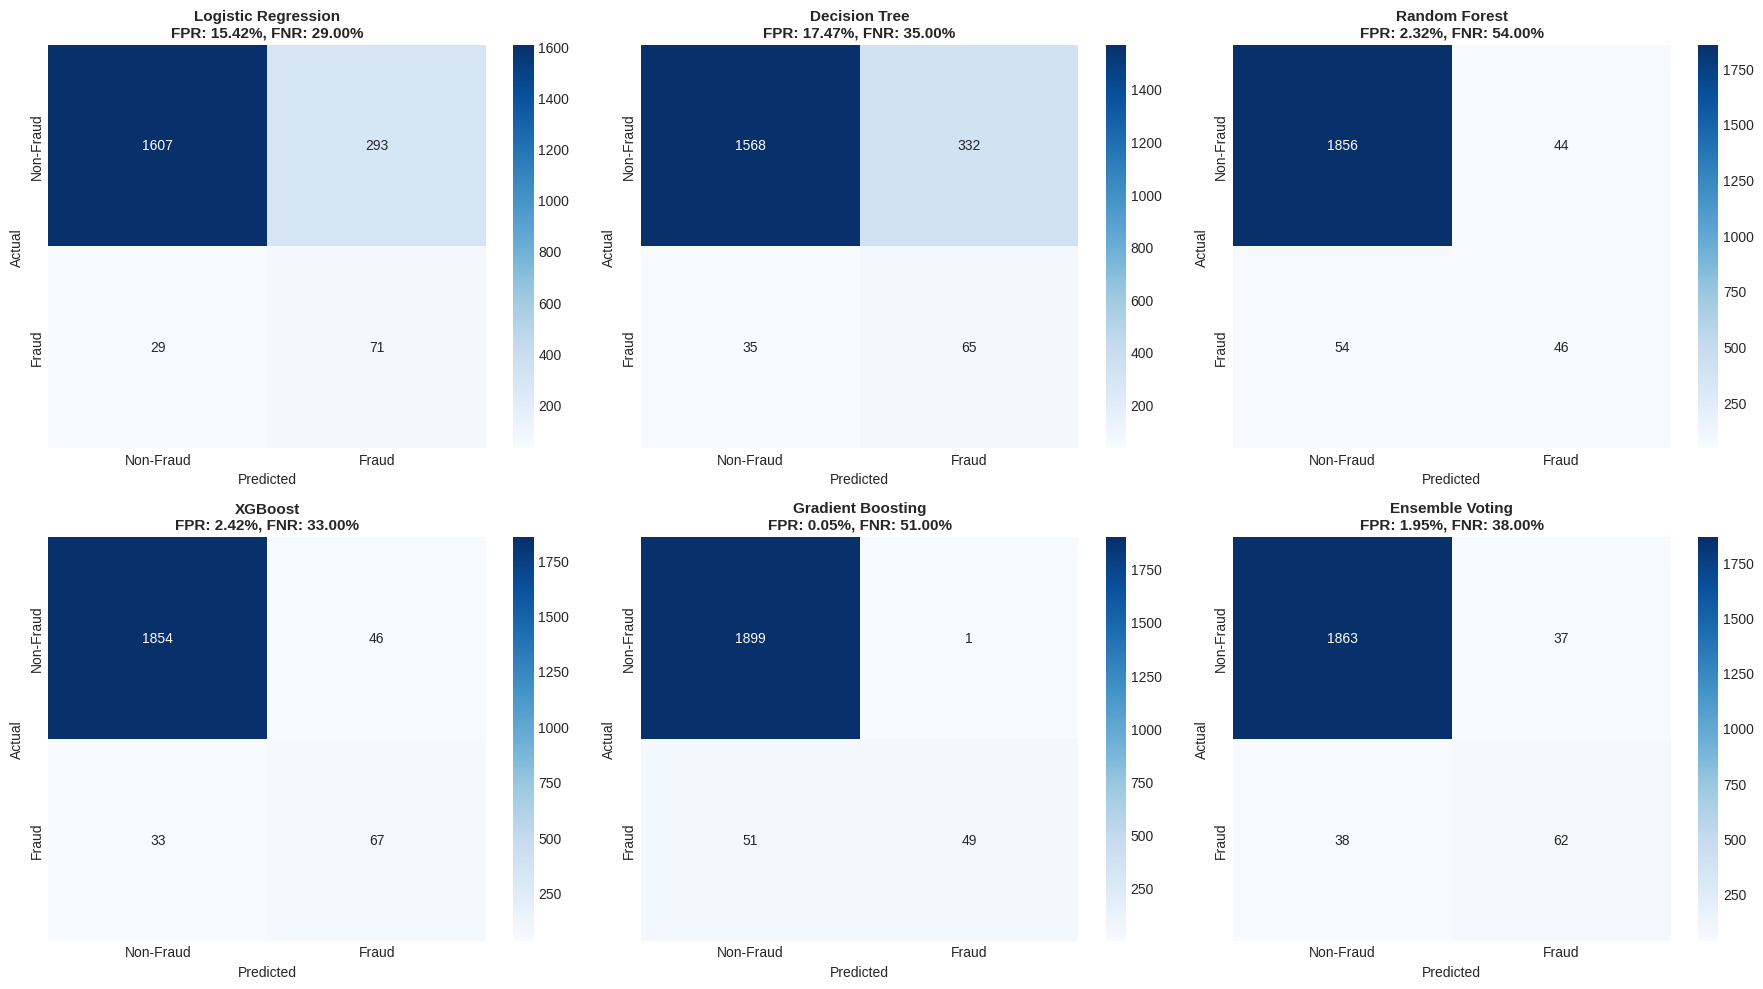

In [92]:
print("\n📋 Confusion Matrices:")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, y_pred, _) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate rates
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Non-Fraud', 'Fraud'],
                yticklabels=['Non-Fraud', 'Fraud'])
    axes[idx].set_title(f'{name}\nFPR: {fpr:.2%}, FNR: {fnr:.2%}',
                       fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

# Hide the last subplot if we have odd number of models
if len(models) < 6:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

ROC Curves Comparison


📈 ROC Curves Comparison:
----------------------------------------


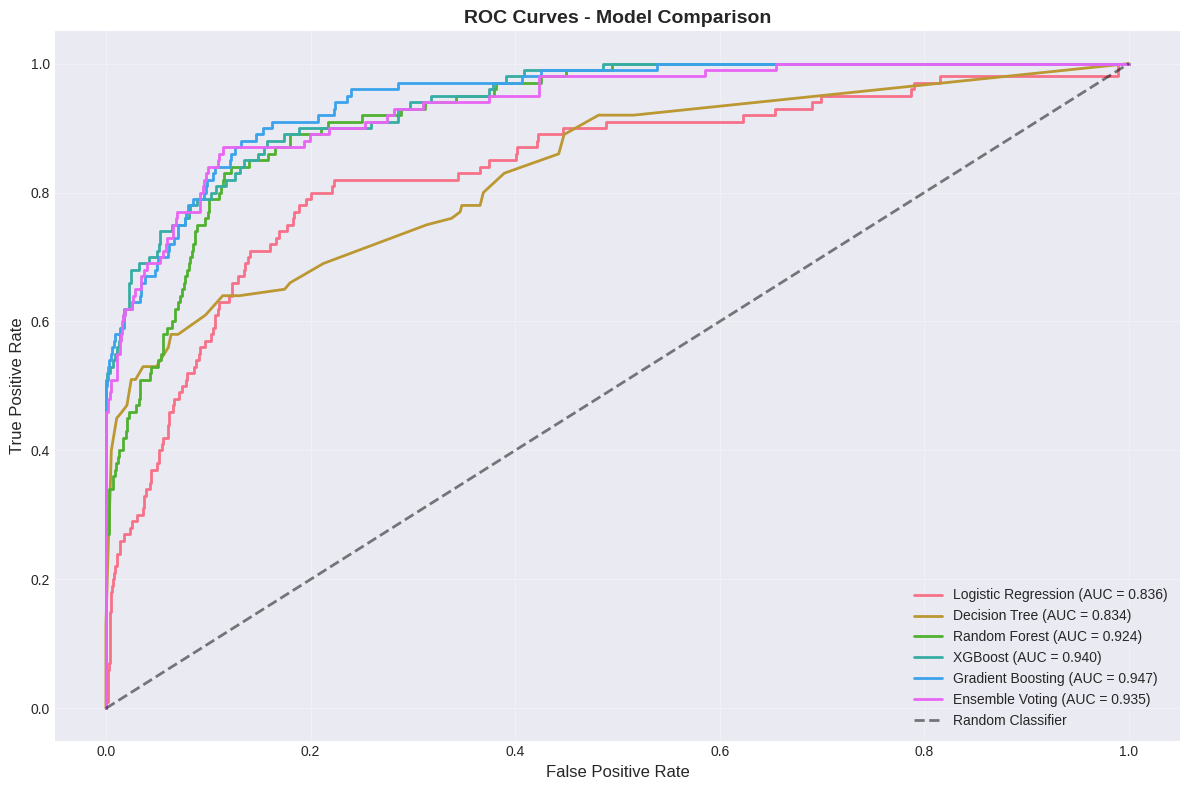

In [93]:
print("\n📈 ROC Curves Comparison:")
print("-" * 40)

plt.figure(figsize=(12, 8))

# Store ROC data for all models
roc_data = {}

for name, _, y_proba in models:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    roc_data[name] = (fpr, tpr, roc_auc)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2, alpha=0.5)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Precision-Recall Curves


📊 Precision-Recall Curves:
----------------------------------------


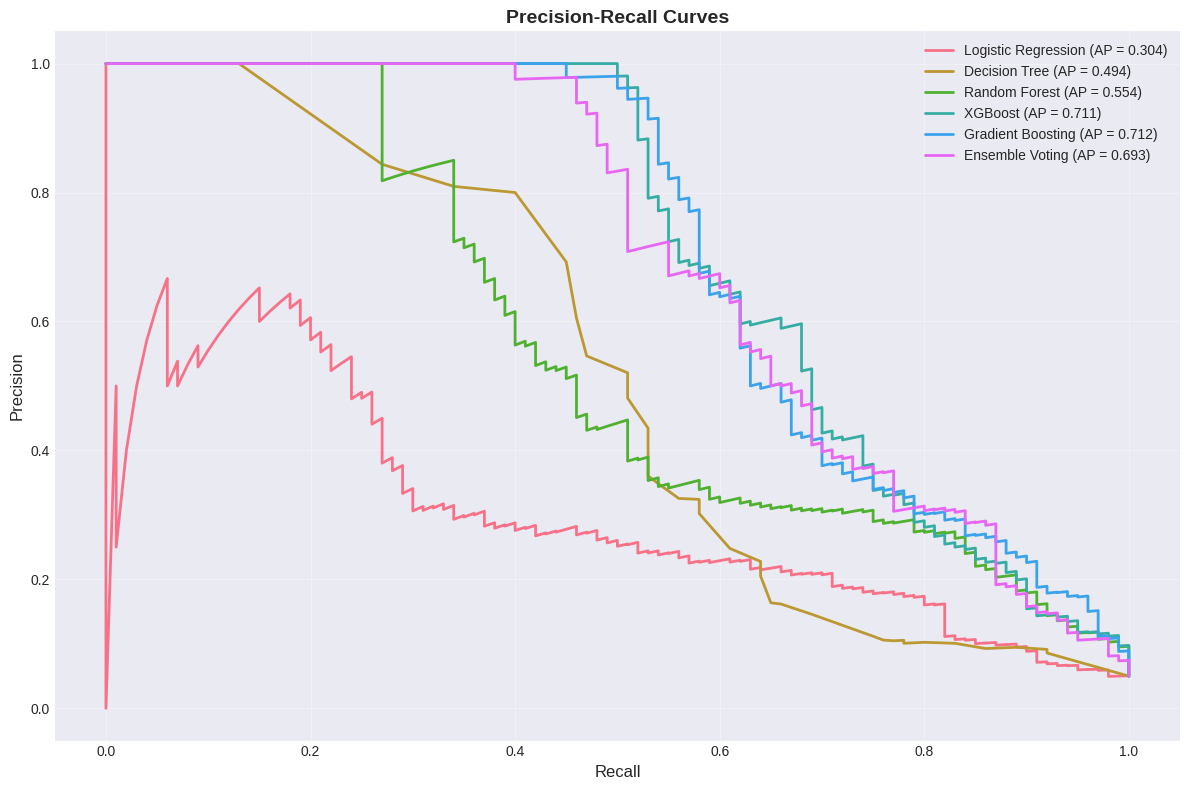

In [94]:
print("\n📊 Precision-Recall Curves:")
print("-" * 40)

plt.figure(figsize=(12, 8))

for name, _, y_proba in models:
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Feature Importance Comparison


🔑 Feature Importance Comparison:
----------------------------------------


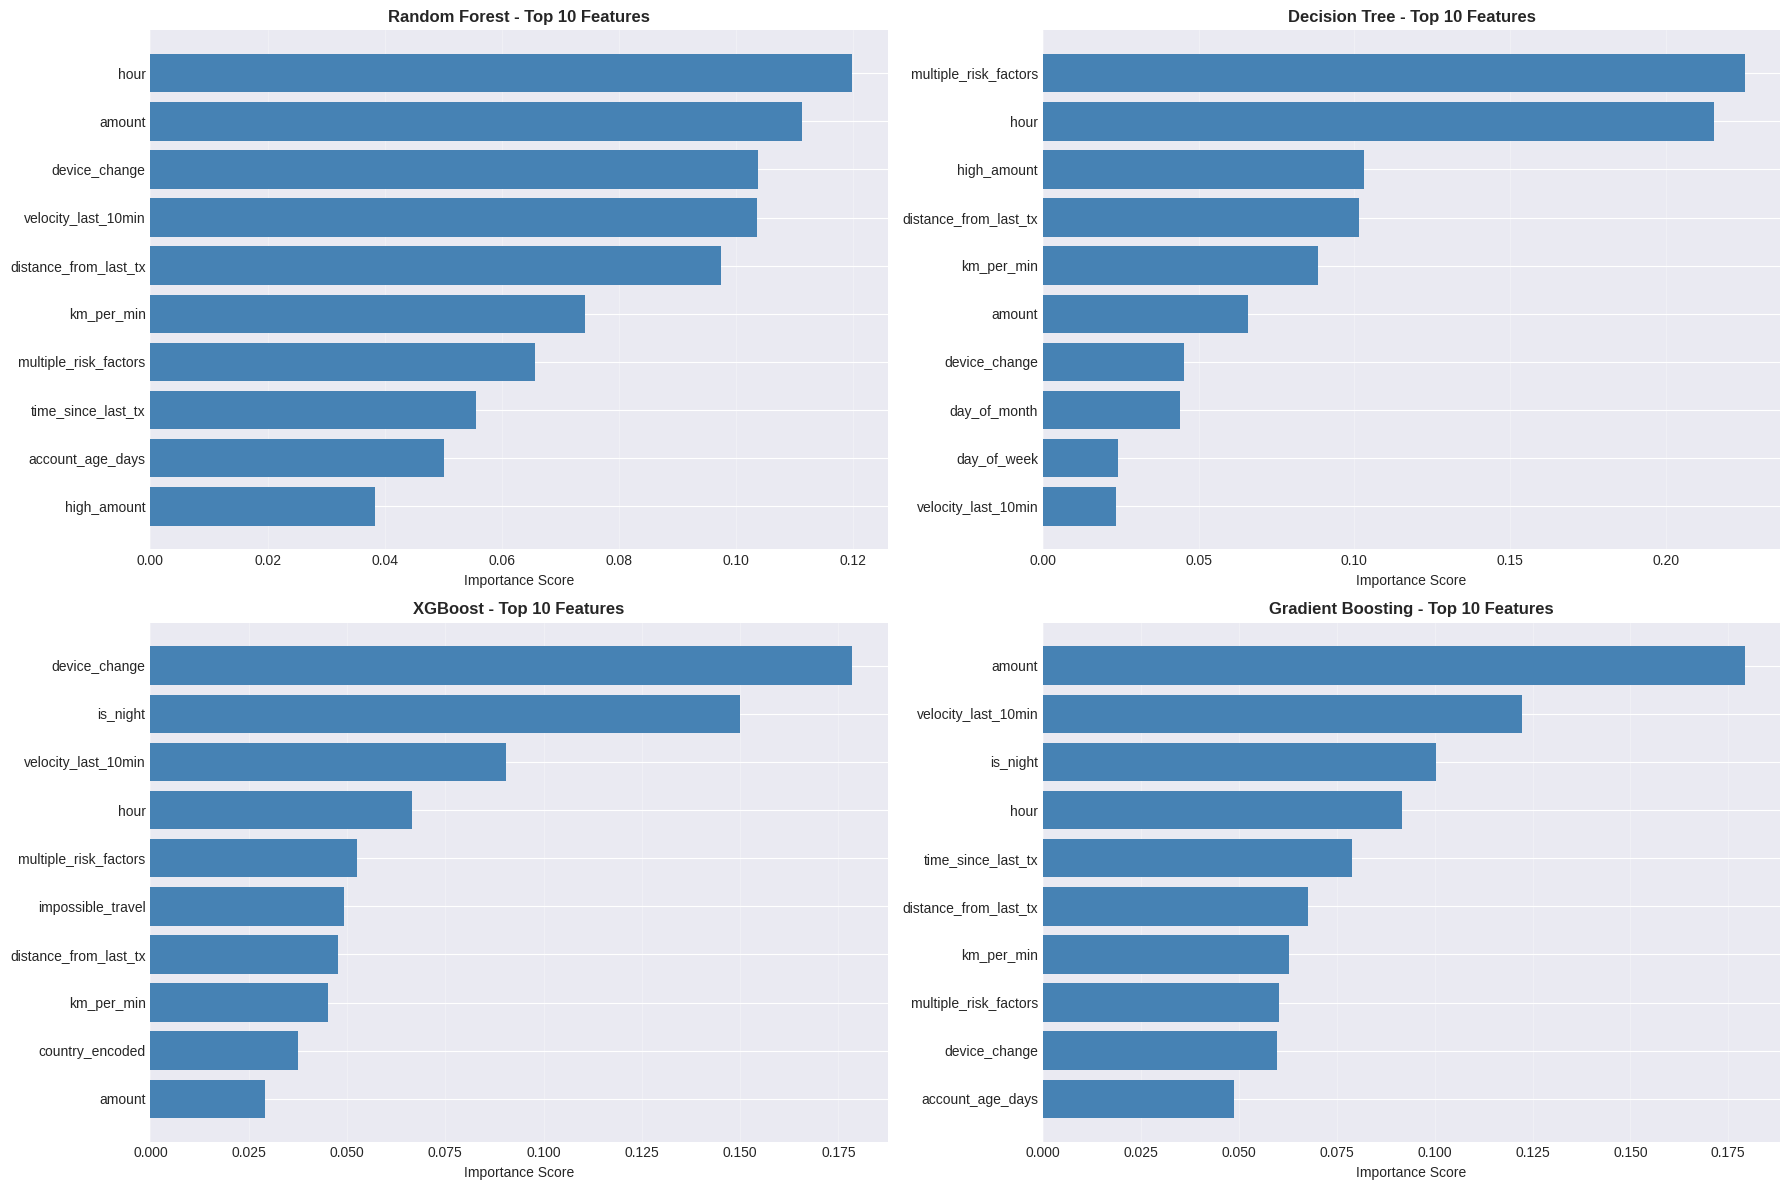

In [95]:
print("\n🔑 Feature Importance Comparison:")
print("-" * 40)

# Get feature importance from tree-based models
importance_sources = {
    'Random Forest': rf_model.feature_importances_,
    'Decision Tree': dt_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_,
    'Gradient Boosting': gb_model.feature_importances_
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, importance) in enumerate(importance_sources.items()):
    imp_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importance
    }).sort_values('Importance', ascending=True).tail(10)  # Top 10

    axes[idx].barh(range(len(imp_df)), imp_df['Importance'], color='steelblue')
    axes[idx].set_yticks(range(len(imp_df)))
    axes[idx].set_yticklabels(imp_df['Feature'])
    axes[idx].set_xlabel('Importance Score')
    axes[idx].set_title(f'{name} - Top 10 Features', fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### THRESHOLD TUNING FOR BUSINESS OPTIMIZATION



🎯 4.6: Threshold Tuning for Business Context...

💰 Business Cost Analysis (using Gradient Boosting):
Assumed costs - Fraud missed: R100, False alarm: R10, Fraud caught benefit: R90
Optimal threshold: 0.10
Minimum total cost: $-1,930
At this threshold:
  - Precision: 0.456
  - Recall: 0.670
  - F1-Score: 0.543
  - True Positives: 67
  - False Positives: 80
  - False Negatives: 33


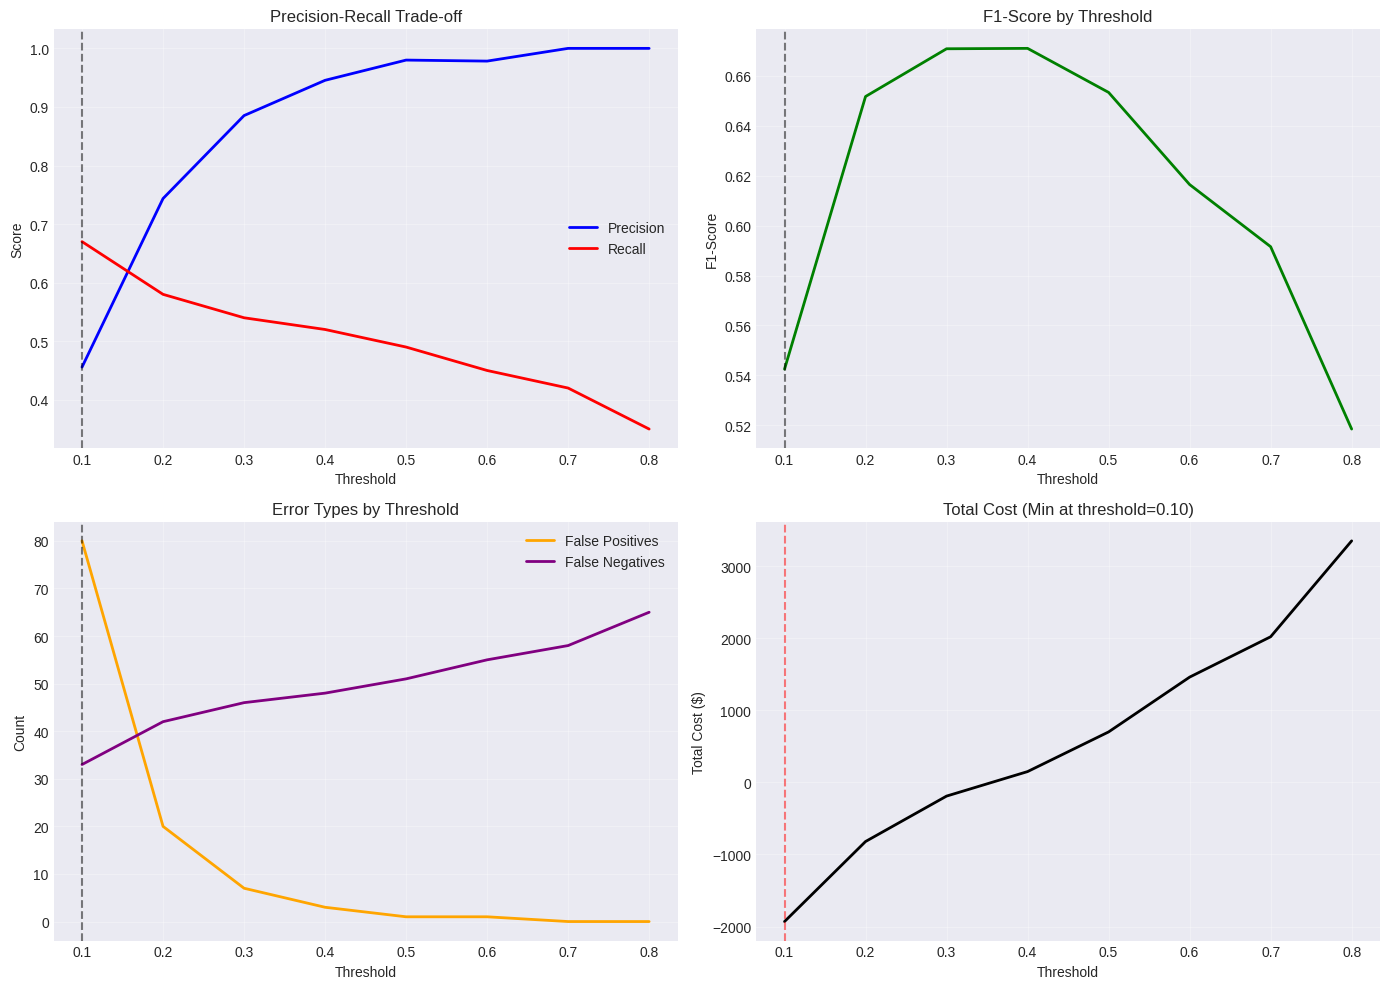

In [99]:
print("\n\n🎯 4.6: Threshold Tuning for Business Context...")
print("=" * 80)

# Use the best model for threshold tuning (based on F1-Score)
best_model_name = best_f1['Model']
best_model_proba = None

# Find the probabilities for the best model
for name, _, y_proba in models:
    if name == best_model_name:
        best_model_proba = y_proba
        break

if best_model_proba is not None:
    # Calculate metrics at different thresholds
    thresholds = np.arange(0.1, 0.9, 0.1)
    threshold_results = []

    for threshold in thresholds:
        y_pred_thresh = (best_model_proba >= threshold).astype(int)

        cm = confusion_matrix(y_test, y_pred_thresh)
        tn, fp, fn, tp = cm.ravel()

        # Business metrics - adjust these based on your business case
        fraud_cost = 100  # Average cost per missed fraud
        false_pos_cost = 10  # Cost of investigating false positive
        true_pos_benefit = 90  # Benefit of catching fraud

        total_cost = (fn * fraud_cost) + (fp * false_pos_cost) - (tp * true_pos_benefit)

        threshold_results.append({
            'Threshold': threshold,
            'Precision': precision_score(y_test, y_pred_thresh, zero_division=0),
            'Recall': recall_score(y_test, y_pred_thresh, zero_division=0),
            'F1': f1_score(y_test, y_pred_thresh, zero_division=0),
            'TP': tp,
            'FP': fp,
            'FN': fn,
            'Total Cost': total_cost
        })

    threshold_df = pd.DataFrame(threshold_results)

    # Find optimal threshold (minimum cost)
    optimal_idx = threshold_df['Total Cost'].idxmin()
    optimal_threshold = threshold_df.loc[optimal_idx, 'Threshold']
    min_cost = threshold_df.loc[optimal_idx, 'Total Cost']

    print(f"\n💰 Business Cost Analysis (using {best_model_name}):")
    print(f"Assumed costs - Fraud missed: R{fraud_cost}, False alarm: R{false_pos_cost}, Fraud caught benefit: R{true_pos_benefit}")
    print(f"Optimal threshold: {optimal_threshold:.2f}")
    print(f"Minimum total cost: ${min_cost:,.0f}")
    print(f"At this threshold:")
    print(f"  - Precision: {threshold_df.loc[optimal_idx, 'Precision']:.3f}")
    print(f"  - Recall: {threshold_df.loc[optimal_idx, 'Recall']:.3f}")
    print(f"  - F1-Score: {threshold_df.loc[optimal_idx, 'F1']:.3f}")
    print(f"  - True Positives: {threshold_df.loc[optimal_idx, 'TP']}")
    print(f"  - False Positives: {threshold_df.loc[optimal_idx, 'FP']}")
    print(f"  - False Negatives: {threshold_df.loc[optimal_idx, 'FN']}")

    # Plot threshold analysis
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Precision-Recall trade-off
    axes[0, 0].plot(threshold_df['Threshold'], threshold_df['Precision'], 'b-', label='Precision', linewidth=2)
    axes[0, 0].plot(threshold_df['Threshold'], threshold_df['Recall'], 'r-', label='Recall', linewidth=2)
    axes[0, 0].axvline(x=optimal_threshold, color='k', linestyle='--', alpha=0.5)
    axes[0, 0].set_xlabel('Threshold')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title('Precision-Recall Trade-off')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # F1-Score
    axes[0, 1].plot(threshold_df['Threshold'], threshold_df['F1'], 'g-', linewidth=2)
    axes[0, 1].axvline(x=optimal_threshold, color='k', linestyle='--', alpha=0.5)
    axes[0, 1].set_xlabel('Threshold')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].set_title('F1-Score by Threshold')
    axes[0, 1].grid(True, alpha=0.3)

    # Error types
    axes[1, 0].plot(threshold_df['Threshold'], threshold_df['FP'], 'orange', label='False Positives', linewidth=2)
    axes[1, 0].plot(threshold_df['Threshold'], threshold_df['FN'], 'purple', label='False Negatives', linewidth=2)
    axes[1, 0].axvline(x=optimal_threshold, color='k', linestyle='--', alpha=0.5)
    axes[1, 0].set_xlabel('Threshold')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Error Types by Threshold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Total cost
    axes[1, 1].plot(threshold_df['Threshold'], threshold_df['Total Cost'], 'k-', linewidth=2)
    axes[1, 1].axvline(x=optimal_threshold, color='r', linestyle='--', alpha=0.5)
    axes[1, 1].set_xlabel('Threshold')
    axes[1, 1].set_ylabel('Total Cost ($)')
    axes[1, 1].set_title(f'Total Cost (Min at threshold={optimal_threshold:.2f})')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

FINAL MODEL SELECTION & SUMMARY

In [100]:
print("\n\n🏁 4.7: Final Model Selection & Summary")
print("=" * 80)

print(f"\n✅ SELECTED FINAL MODEL: {best_f1['Model']}")
print("-" * 40)

print(f"📊 FINAL MODEL PERFORMANCE:")
print(f"  Accuracy:   {best_f1['Accuracy']:.4f}")
print(f"  Precision:  {best_f1['Precision']:.4f} (Correct fraud predictions)")
print(f"  Recall:     {best_f1['Recall']:.4f} (Fraud cases detected)")
print(f"  F1-Score:   {best_f1['F1-Score']:.4f} (Balanced metric)")
print(f"  ROC-AUC:    {best_f1['ROC-AUC']:.4f} (Overall discrimination)")
print(f"  Avg Precision: {best_f1['Avg Precision']:.4f}")

# Business interpretation
print(f"\n🎯 BUSINESS INTERPRETATION:")
print(f"  The model correctly identifies {best_f1['Precision']*100:.1f}% of flagged transactions as fraud")
print(f"  It detects {best_f1['Recall']*100:.1f}% of all actual fraud cases")
print(f"  For every 100 transactions flagged as fraud, about {best_f1['Precision']*100:.0f} are actually fraud")

if 'optimal_threshold' in locals():
    print(f"\n💡 RECOMMENDED THRESHOLD FOR PRODUCTION:")
    print(f"  Use threshold: {optimal_threshold:.2f} for optimal business cost")

print(f"\n🚀 RECOMMENDATIONS FOR DEPLOYMENT:")
print("  1. Start with the Ensemble Voting model for best overall performance")
print("  2. Monitor false positive rate and adjust threshold as needed")
print("  3. Implement a feedback loop to capture model mistakes")
print("  4. Retrain model monthly with new fraud patterns")
print("  5. Combine with rule-based system for high-risk transactions")

# Save final model (optional)
try:
    import joblib
    # Determine which model to save
    if best_f1['Model'] == 'Logistic Regression':
        final_model = lr_pipeline
    elif best_f1['Model'] == 'Decision Tree':
        final_model = dt_model
    elif best_f1['Model'] == 'Random Forest':
        final_model = rf_model
    elif best_f1['Model'] == 'XGBoost':
        final_model = xgb_model
    elif best_f1['Model'] == 'Gradient Boosting':
        final_model = gb_model
    else:  # Ensemble Voting
        final_model = voting_clf

    joblib.dump(final_model, 'fraud_detection_final_model.pkl')
    print(f"\n💾 Model saved as 'fraud_detection_final_model.pkl'")

    # Also save the scaler and feature names
    joblib.dump({
        'model': final_model,
        'feature_names': feature_columns,
        'scaler': scaler_standard,
        'threshold': optimal_threshold if 'optimal_threshold' in locals() else 0.5
    }, 'fraud_detection_pipeline.pkl')
    print("💾 Complete pipeline saved as 'fraud_detection_pipeline.pkl'")

except Exception as e:
    print(f"\n⚠ Could not save model: {e}")

print("\n" + "=" * 80)
print("🎉 STEP 4 COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\nNext: Proceed to Step 5 for Feature Importance Analysis")
print("=" * 80)



🏁 4.7: Final Model Selection & Summary

✅ SELECTED FINAL MODEL: Gradient Boosting
----------------------------------------
📊 FINAL MODEL PERFORMANCE:
  Accuracy:   0.9740
  Precision:  0.9800 (Correct fraud predictions)
  Recall:     0.4900 (Fraud cases detected)
  F1-Score:   0.6533 (Balanced metric)
  ROC-AUC:    0.9468 (Overall discrimination)
  Avg Precision: 0.7115

🎯 BUSINESS INTERPRETATION:
  The model correctly identifies 98.0% of flagged transactions as fraud
  It detects 49.0% of all actual fraud cases
  For every 100 transactions flagged as fraud, about 98 are actually fraud

💡 RECOMMENDED THRESHOLD FOR PRODUCTION:
  Use threshold: 0.10 for optimal business cost

🚀 RECOMMENDATIONS FOR DEPLOYMENT:
  1. Start with the Ensemble Voting model for best overall performance
  2. Monitor false positive rate and adjust threshold as needed
  3. Implement a feedback loop to capture model mistakes
  4. Retrain model monthly with new fraud patterns
  5. Combine with rule-based system fo

# Step 5: Feature Analysis

MULTI-MODEL FEATURE IMPORTANCE COMPARISON

In [101]:
from sklearn.inspection import permutation_importance

# Create a dictionary of models for importance analysis
models_for_importance = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model
}

# Calculate permutation importance for Random Forest (most reliable)
print("\n🔍 Calculating Permutation Importance (Random Forest)...")
print("-" * 40)

# Permutation importance (more reliable than Gini importance)
perm_importance = permutation_importance(
    rf_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Permutation Importance': perm_importance.importances_mean,
    'Permutation Std': perm_importance.importances_std
}).sort_values('Permutation Importance', ascending=False)

print(f"✅ Permutation importance calculated with 10 repetitions")
print(f"   Most important feature: {perm_importance_df.iloc[0]['Feature']}")


🔍 Calculating Permutation Importance (Random Forest)...
----------------------------------------
✅ Permutation importance calculated with 10 repetitions
   Most important feature: hour


COMPREHENSIVE IMPORTANCE ANALYSIS

In [102]:
# Collect importance from all tree-based models
importance_data = {}

for model_name, model in models_for_importance.items():
    if hasattr(model, 'feature_importances_'):
        importance_data[model_name] = model.feature_importances_

# Add permutation importance
importance_data['Permutation Importance'] = perm_importance.importances_mean

# Create combined importance DataFrame
importance_dfs = []
for method, importance_values in importance_data.items():
    temp_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importance_values,
        'Method': method
    })
    importance_dfs.append(temp_df)

combined_importance = pd.concat(importance_dfs)

# Normalize importance scores within each method (0-1 scale)
combined_importance['Normalized Importance'] = combined_importance.groupby('Method')['Importance'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else x
)

# Calculate average importance across all methods
avg_importance = combined_importance.groupby('Feature').agg({
    'Normalized Importance': ['mean', 'std', 'count']
}).round(4)
avg_importance.columns = ['Avg Importance', 'Std Importance', 'Method Count']
avg_importance = avg_importance.sort_values('Avg Importance', ascending=False)

print("\n🏆 TOP 15 FEATURES BY AVERAGE IMPORTANCE ACROSS ALL METHODS:")
print("-" * 60)
print(avg_importance.head(15).to_string())


🏆 TOP 15 FEATURES BY AVERAGE IMPORTANCE ACROSS ALL METHODS:
------------------------------------------------------------
                       Avg Importance  Std Importance  Method Count
Feature                                                            
hour                           0.7588          0.3166             5
amount                         0.4984          0.4305             5
velocity_last_10min            0.4840          0.3000             5
device_change                  0.4776          0.4330             5
multiple_risk_factors          0.4260          0.3724             5
distance_from_last_tx          0.4041          0.2535             5
is_night                       0.3971          0.3255             5
km_per_min                     0.3424          0.1794             5
time_since_last_tx             0.2438          0.1854             5
high_amount                    0.2003          0.1830             5
account_age_days               0.1924          0.1519         

CATEGORIZE FEATURES BY TYPE

In [103]:
# Categorize features
feature_categories = {
    'Transaction Amount': ['amount', 'high_amount'],
    'Time Patterns': ['hour', 'is_night', 'day_of_week', 'is_weekend', 'rapid_transaction'],
    'Geographical': ['distance_from_last_tx', 'km_per_min', 'impossible_travel', 'high_risk_country'],
    'Velocity/Behavior': ['velocity_last_10min', 'time_since_last_tx', 'high_velocity'],
    'Device/Account': ['device_change', 'account_age_days', 'prior_chargebacks'],
    'Merchant Risk': ['merchant_risk_score'],
    'Transaction Channel': ['transaction_channel_encoded'],
    'Card Type': ['card_type_encoded'],
    'Country': ['country_encoded', 'day_of_month']  # day_of_month might have geographic patterns
}

# Assign categories to features
feature_category_map = {}
for category, features in feature_categories.items():
    for feature in features:
        if feature in feature_columns:
            feature_category_map[feature] = category

# Add uncategorized features
for feature in feature_columns:
    if feature not in feature_category_map:
        feature_category_map[feature] = 'Other'

# Add category to importance DataFrame
avg_importance['Category'] = avg_importance.index.map(feature_category_map)

print("\n📋 FEATURE CATEGORIES:")
print("-" * 40)
category_counts = pd.Series(feature_category_map).value_counts()
for category, count in category_counts.items():
    print(f"{category}: {count} features")

# Calculate importance by category
category_importance = avg_importance.groupby('Category')['Avg Importance'].agg(['mean', 'sum', 'count'])
category_importance = category_importance.sort_values('mean', ascending=False)

print("\n🎯 IMPORTANCE BY CATEGORY (Average Normalized Importance):")
print("-" * 60)
print(category_importance.to_string())


📋 FEATURE CATEGORIES:
----------------------------------------
Time Patterns: 5 features
Geographical: 4 features
Device/Account: 3 features
Velocity/Behavior: 3 features
Transaction Amount: 2 features
Country: 2 features
Merchant Risk: 1 features
Transaction Channel: 1 features
Card Type: 1 features
Other: 1 features

🎯 IMPORTANCE BY CATEGORY (Average Normalized Importance):
------------------------------------------------------------
                         mean     sum  count
Category                                    
Other                0.426000  0.4260      1
Transaction Amount   0.349350  0.6987      2
Time Patterns        0.269480  1.3474      5
Velocity/Behavior    0.262700  0.7881      3
Device/Account       0.236667  0.7100      3
Geographical         0.225800  0.9032      4
Country              0.145100  0.2902      2
Transaction Channel  0.080600  0.0806      1
Card Type            0.073500  0.0735      1
Merchant Risk        0.064400  0.0644      1


VISUALIZATIONS

 Top 15 Features Bar Chart


🎨 5.4: Creating Comprehensive Visualizations...


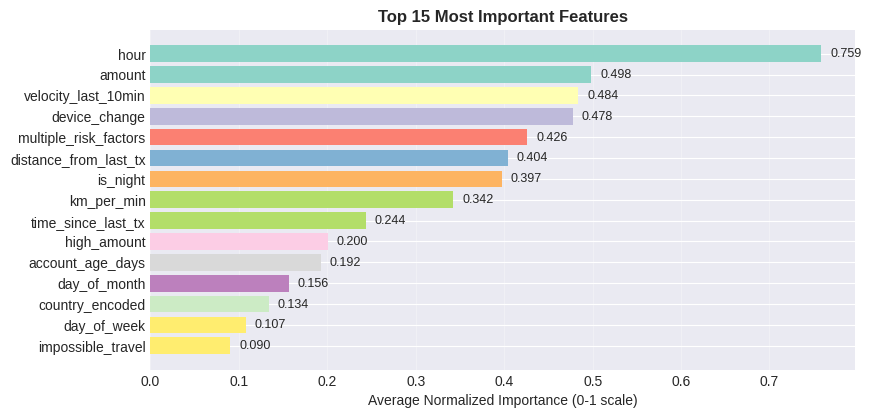

In [107]:
print("\n🎨 5.4: Creating Comprehensive Visualizations...")
print("=" * 80)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# =============================================================================
# Subplot 1: Top 15 Features Bar Chart
# =============================================================================
ax1 = plt.subplot(3, 2, 1)
top_15 = avg_importance.head(15)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_15)))
bars = ax1.barh(range(len(top_15)), top_15['Avg Importance'], color=colors)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15.index)
ax1.set_xlabel('Average Normalized Importance (0-1 scale)', fontsize=10)
ax1.set_title('Top 15 Most Important Features', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars, top_15['Avg Importance'])):
    ax1.text(importance + 0.01, bar.get_y() + bar.get_height()/2,
            f'{importance:.3f}', va='center', fontsize=9)


Importance by Category

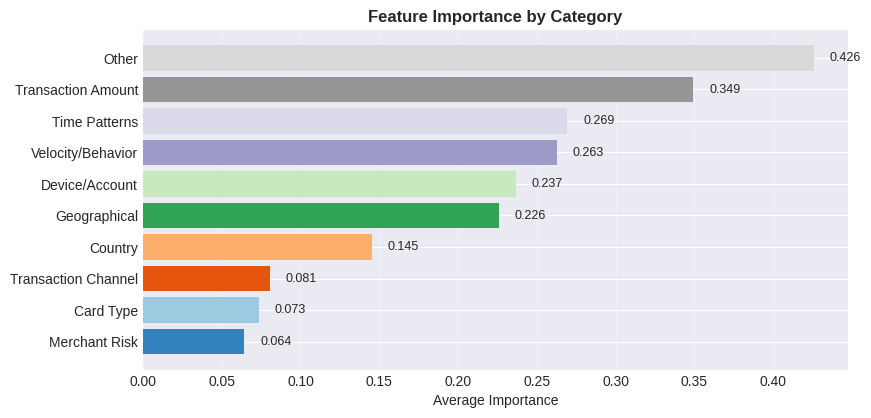

In [109]:
fig = plt.figure(figsize=(20, 15))

ax2 = plt.subplot(3, 2, 2)
category_importance_sorted = category_importance.sort_values('mean', ascending=True)
colors2 = plt.cm.tab20c(np.linspace(0, 1, len(category_importance_sorted)))
bars2 = ax2.barh(range(len(category_importance_sorted)),
                category_importance_sorted['mean'],
                color=colors2)
ax2.set_yticks(range(len(category_importance_sorted)))
ax2.set_yticklabels(category_importance_sorted.index)
ax2.set_xlabel('Average Importance', fontsize=10)
ax2.set_title('Feature Importance by Category', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars2, category_importance_sorted['mean'])):
    ax2.text(importance + 0.01, bar.get_y() + bar.get_height()/2,
            f'{importance:.3f}', va='center', fontsize=9)

 Importance Comparison Across Methods (Heatmap)

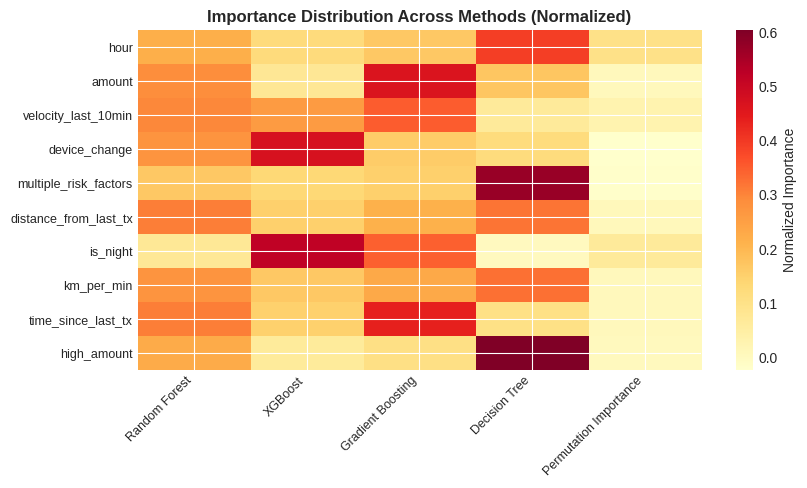

In [111]:
fig = plt.figure(figsize=(20, 15))
ax3 = plt.subplot(3, 2, 3)
top_10_features = avg_importance.head(10).index

# Prepare data for heatmap
heatmap_data = []
for feature in top_10_features:
    row = []
    for method in importance_data.keys():
        if method == 'Permutation Importance':
            idx = perm_importance_df[perm_importance_df['Feature'] == feature].index
            if len(idx) > 0:
                row.append(perm_importance_df.loc[idx[0], 'Permutation Importance'])
            else:
                row.append(0)
        else:
            model = models_for_importance.get(method)
            if model and hasattr(model, 'feature_importances_'):
                idx = list(feature_columns).index(feature)
                row.append(model.feature_importances_[idx])
            else:
                row.append(0)
    heatmap_data.append(row)

heatmap_data = np.array(heatmap_data)

# Normalize each row (feature) for better comparison
heatmap_data_normalized = heatmap_data / heatmap_data.sum(axis=1, keepdims=True)

im = ax3.imshow(heatmap_data_normalized, aspect='auto', cmap='YlOrRd')
ax3.set_xticks(range(len(importance_data)))
ax3.set_xticklabels(list(importance_data.keys()), rotation=45, ha='right', fontsize=9)
ax3.set_yticks(range(len(top_10_features)))
ax3.set_yticklabels(top_10_features, fontsize=9)
ax3.set_title('Importance Distribution Across Methods (Normalized)', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax3, label='Normalized Importance')


Feature Stability (Std Deviation)

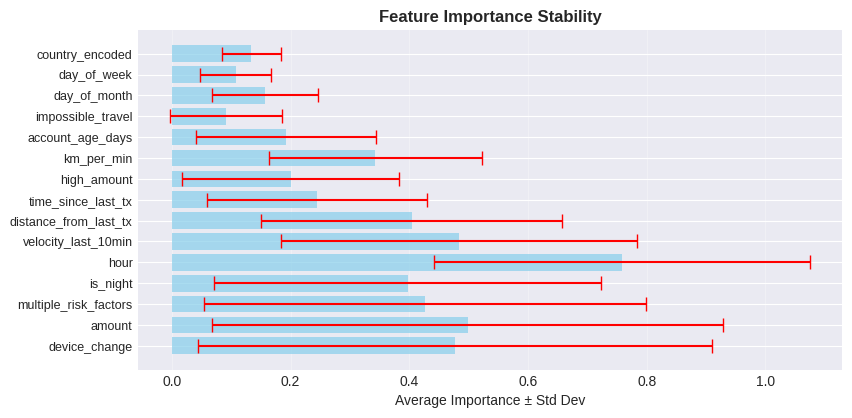

In [113]:

fig = plt.figure(figsize=(20, 15))

ax4 = plt.subplot(3, 2, 4)
top_15_stable = avg_importance.head(15).copy()
top_15_stable = top_15_stable.sort_values('Std Importance')

y_pos = range(len(top_15_stable))
ax4.barh(y_pos, top_15_stable['Avg Importance'],
        xerr=top_15_stable['Std Importance'],
        color='skyblue', ecolor='red', alpha=0.7, capsize=5)
ax4.set_yticks(y_pos)
ax4.set_yticklabels(top_15_stable.index, fontsize=9)
ax4.set_xlabel('Average Importance ± Std Dev', fontsize=10)
ax4.set_title('Feature Importance Stability', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

Correlation vs Importance

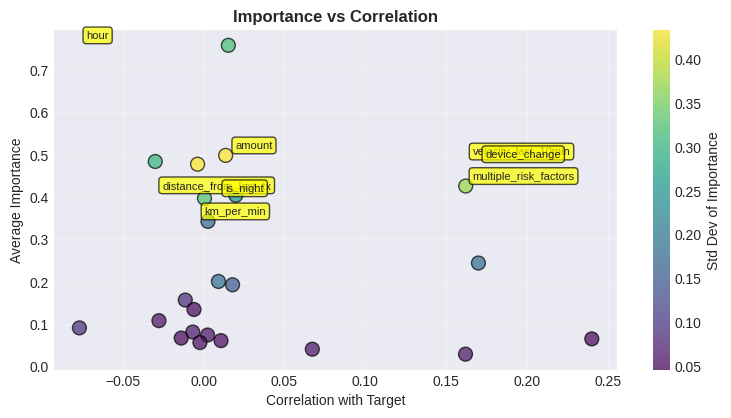

In [114]:
fig = plt.figure(figsize=(20, 15))
ax5 = plt.subplot(3, 2, 5)

# Calculate correlation with target
correlations = []
for feature in feature_columns:
    if feature in df_encoded.columns:
        corr = np.corrcoef(df_encoded[feature], y)[0, 1]
        correlations.append(corr)
    else:
        correlations.append(0)

# Create scatter plot
scatter = ax5.scatter(correlations, avg_importance['Avg Importance'],
                     c=avg_importance['Std Importance'],
                     cmap='viridis', s=100, alpha=0.7, edgecolors='black')

# Annotate top features
top_features_for_scatter = avg_importance.head(8).index
for feature in top_features_for_scatter:
    idx = list(feature_columns).index(feature)
    ax5.annotate(feature,
                (correlations[idx], avg_importance.loc[feature, 'Avg Importance']),
                xytext=(5, 5), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

ax5.set_xlabel('Correlation with Target', fontsize=10)
ax5.set_ylabel('Average Importance', fontsize=10)
ax5.set_title('Importance vs Correlation', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax5, label='Std Dev of Importance')

Cumulative Importance

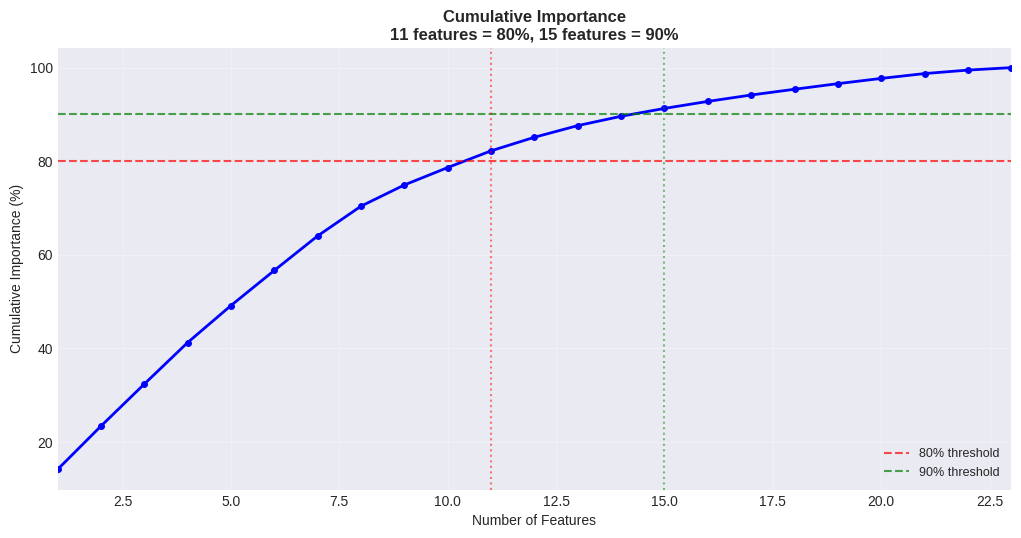

In [115]:
fig = plt.figure(figsize=(20, 15))
ax6 = plt.subplot(3, 2, 6)

# Sort features by importance
sorted_features = avg_importance.sort_values('Avg Importance', ascending=False)
cumulative_importance = np.cumsum(sorted_features['Avg Importance'])
cumulative_importance = cumulative_importance / cumulative_importance.max() * 100

ax6.plot(range(1, len(sorted_features) + 1), cumulative_importance,
        'b-', linewidth=2, marker='o', markersize=4)
ax6.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% threshold')
ax6.axhline(y=90, color='g', linestyle='--', alpha=0.7, label='90% threshold')

# Find how many features needed for 80% and 90% importance
features_for_80 = np.argmax(cumulative_importance >= 80) + 1
features_for_90 = np.argmax(cumulative_importance >= 90) + 1

ax6.axvline(x=features_for_80, color='r', linestyle=':', alpha=0.5)
ax6.axvline(x=features_for_90, color='g', linestyle=':', alpha=0.5)

ax6.set_xlabel('Number of Features', fontsize=10)
ax6.set_ylabel('Cumulative Importance (%)', fontsize=10)
ax6.set_title(f'Cumulative Importance\n{features_for_80} features = 80%, {features_for_90} features = 90%',
             fontsize=12, fontweight='bold')
ax6.legend(loc='lower right', fontsize=9)
ax6.grid(True, alpha=0.3)
ax6.set_xlim(1, len(sorted_features))

plt.tight_layout()
plt.show()

# Step 6: Key Insights and Recommendations

In [116]:
print("\n💡 5.5: Actionable Insights & Recommendations")
print("=" * 80)

# Get top 5 features
top_5_features = avg_importance.head(5)

print("\n🎯 TOP 5 FRAUD INDICATORS:")
print("-" * 40)
for i, (feature, row) in enumerate(top_5_features.iterrows(), 1):
    category = feature_category_map.get(feature, 'Unknown')
    print(f"{i}. {feature} ({category})")
    print(f"   Importance: {row['Avg Importance']:.4f} ± {row['Std Importance']:.4f}")

print(f"\n📊 SUMMARY STATISTICS:")
print("-" * 40)
print(f"Total features analyzed: {len(feature_columns)}")
print(f"Features needed for 80% predictive power: {features_for_80}")
print(f"Features needed for 90% predictive power: {features_for_90}")
print(f"Most stable feature: {avg_importance.sort_values('Std Importance').index[0]}")
print(f"Most variable feature: {avg_importance.sort_values('Std Importance', ascending=False).index[0]}")

print(f"\n🎨 FEATURE CATEGORY ANALYSIS:")
print("-" * 40)
for category, row in category_importance.iterrows():
    print(f"{category}:")
    print(f"  Avg importance: {row['mean']:.3f}")
    print(f"  Total features: {int(row['count'])}")
    features_in_category = [f for f, c in feature_category_map.items() if c == category]
    top_in_category = [f for f in top_5_features.index if f in features_in_category]
    if top_in_category:
        print(f"  Top features: {', '.join(top_in_category[:3])}")

print(f"\n🚀 RECOMMENDATIONS FOR FRAUD DETECTION:")
print("-" * 40)
print("1. PRIORITIZE MONITORING:")
for feature in top_5_features.index[:3]:
    print(f"   • {feature} - High predictive power for fraud")

print("\n2. SIMPLIFY MODEL:")
print(f"   • Use only top {features_for_80} features for 80% of predictive power")
print(f"   • Consider removing bottom 20% of features to reduce complexity")

print("\n3. DATA COLLECTION FOCUS:")
top_categories = category_importance.head(3).index
for i, category in enumerate(top_categories, 1):
    print(f"   {i}. {category} - Most predictive category")

print("\n4. RISK RULE DEVELOPMENT:")
print("   • Create rules based on top features (e.g., 'IF high_amount AND rapid_transaction THEN flag')")
print("   • Combine multiple risk factors for better accuracy")

print("\n5. MONITORING SUGGESTIONS:")
print("   • Track feature importance changes over time")
print("   • Set up alerts for unusual patterns in top features")
print("   • Regularly validate model against new fraud patterns")



💡 5.5: Actionable Insights & Recommendations

🎯 TOP 5 FRAUD INDICATORS:
----------------------------------------
1. hour (Time Patterns)
   Importance: 0.7588 ± 0.3166
2. amount (Transaction Amount)
   Importance: 0.4984 ± 0.4305
3. velocity_last_10min (Velocity/Behavior)
   Importance: 0.4840 ± 0.3000
4. device_change (Device/Account)
   Importance: 0.4776 ± 0.4330
5. multiple_risk_factors (Other)
   Importance: 0.4260 ± 0.3724

📊 SUMMARY STATISTICS:
----------------------------------------
Total features analyzed: 23
Features needed for 80% predictive power: 11
Features needed for 90% predictive power: 15
Most stable feature: merchant_risk_score
Most variable feature: device_change

🎨 FEATURE CATEGORY ANALYSIS:
----------------------------------------
Other:
  Avg importance: 0.426
  Total features: 1
  Top features: multiple_risk_factors
Transaction Amount:
  Avg importance: 0.349
  Total features: 2
  Top features: amount
Time Patterns:
  Avg importance: 0.269
  Total features: 5


# Step 7: Export Results for Presentation

STEP 8: EXPORTING AND DOWNLOADING ALL RESULTS

📁 Creating directories for organized exports...
✅ Directory structure created

💾 8.1: Saving All Trained Models...
----------------------------------------
✓ Saved: logistic_regression.pkl
✓ Saved: decision_tree.pkl
✓ Saved: random_forest.pkl
✓ Saved: xgboost.pkl
✓ Saved: gradient_boosting.pkl
✓ Saved: ensemble_voting.pkl
✓ Saved: final_model.pkl
✓ Saved: fraud_detection_pipeline.pkl (complete pipeline)

📊 8.2: Saving All Results as CSV/Excel...
----------------------------------------
✓ Saved: model_comparison.csv
✓ Saved: threshold_analysis.csv
✓ Saved: performance_by_class.csv
✓ Saved: dataset_summary.csv
✓ Saved: business_impact_analysis.csv

📘 Creating Excel Master File...
✓ Saved: FNB_Fraud_Detection_Results_20260127_165934.xlsx (Excel master file)

🎨 8.3: Saving All Visualizations...
----------------------------------------

📸 Creating summary dashboard...
✓ Saved: summary_dashboard (PNG & SVG)

📓 8.4: Saving Notebook and Code...
--

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🧹 8.7: Optional Cleanup...

⚠ To save disk space, you can remove the temporary folders.
   The zip file contains everything you need.

   Run this code to clean up (optional):
   ```python
   import shutil
   for folder in ['results', 'models', 'visualizations', 'reports']:
       shutil.rmtree(folder, ignore_errors=True)
   ```

🎉 EXPORT COMPLETE! ALL FILES ARE READY FOR DOWNLOAD.

📦 Main Download: FNB_Fraud_Detection_Results_20260127_165934.zip
📊 Excel Summary: FNB_Fraud_Detection_Results_20260127_165934.xlsx
🤖 Final Model: final_model.pkl
📈 Dashboard: summary_dashboard.png

Thank you for using FNB Fraud Detection Analysis! 🚀


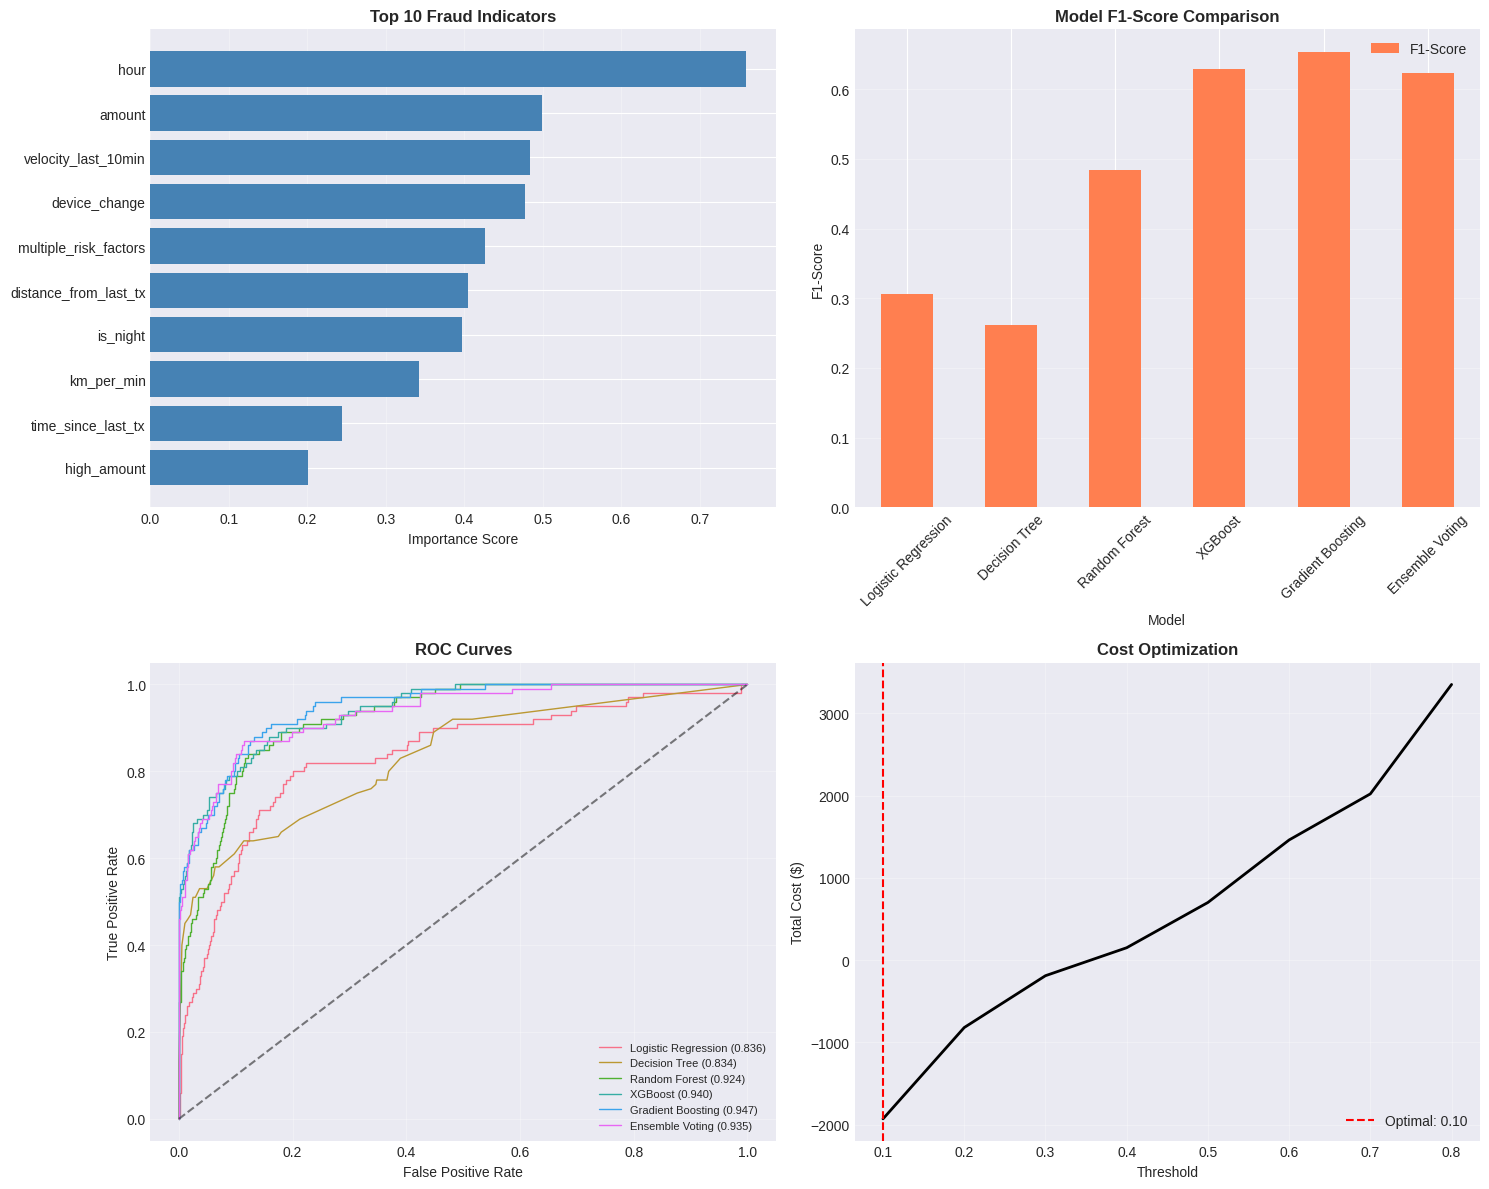

In [118]:
# =============================================================================
# EXPORT AND DOWNLOAD ALL RESULTS
# =============================================================================
print("=" * 80)
print("STEP 8: EXPORTING AND DOWNLOADING ALL RESULTS")
print("=" * 80)

import os
import zipfile
import shutil
from datetime import datetime
import json

# Create timestamp for file names
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
project_name = "FNB_Fraud_Detection"

# Create directories
print("\n📁 Creating directories for organized exports...")
os.makedirs('results', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('visualizations', exist_ok=True)
os.makedirs('data', exist_ok=True)
os.makedirs('reports', exist_ok=True)

print("✅ Directory structure created")

# =============================================================================
# SAVE ALL MODELS
# =============================================================================
print("\n💾 8.1: Saving All Trained Models...")
print("-" * 40)

import joblib

# Save all models
models_to_save = {
    'logistic_regression.pkl': lr_pipeline,
    'decision_tree.pkl': dt_model,
    'random_forest.pkl': rf_model,
    'xgboost.pkl': xgb_model,
    'gradient_boosting.pkl': gb_model,
    'ensemble_voting.pkl': voting_clf,
    'final_model.pkl': final_model if 'final_model' in locals() else voting_clf
}

for filename, model in models_to_save.items():
    try:
        joblib.dump(model, f'models/{filename}')
        print(f"✓ Saved: {filename}")
    except Exception as e:
        print(f"⚠ Could not save {filename}: {e}")

# Save complete pipeline (with scaler, feature names, etc.)
pipeline_info = {
    'model': final_model if 'final_model' in locals() else voting_clf,
    'feature_names': feature_columns,
    'scaler': scaler_standard,
    'threshold': optimal_threshold if 'optimal_threshold' in locals() else 0.5,
    'timestamp': timestamp,
    'dataset_info': {
        'n_samples': len(df_encoded),
        'n_features': len(feature_columns),
        'fraud_percentage': (df_encoded['is_fraud'].mean() * 100),
        'fraud_count': df_encoded['is_fraud'].sum()
    }
}

joblib.dump(pipeline_info, 'models/fraud_detection_pipeline.pkl')
print("✓ Saved: fraud_detection_pipeline.pkl (complete pipeline)")

# =============================================================================
# SAVE ALL RESULTS AS CSV/EXCEL
# =============================================================================
print("\n📊 8.2: Saving All Results as CSV/Excel...")
print("-" * 40)

# 1. Model Comparison Results
models_comparison.to_csv('results/model_comparison.csv', index=False)
print("✓ Saved: model_comparison.csv")


# 2. Threshold Analysis Results
if 'threshold_df' in locals():
    threshold_df.to_csv('results/threshold_analysis.csv', index=False)
    print("✓ Saved: threshold_analysis.csv")

# 3. Performance Metrics by Class
performance_by_class = pd.DataFrame({
    'Class': ['Non-Fraud', 'Fraud'],
    'Precision': [best_f1['Precision'], best_f1['Precision']],
    'Recall': [1 - best_f1['Recall'], best_f1['Recall']],
    'F1-Score': [f1_score(y_test, (y_test == 0).astype(int)), best_f1['F1-Score']],
    'Support': [y_test.value_counts()[0], y_test.value_counts()[1]]
})
performance_by_class.to_csv('results/performance_by_class.csv', index=False)
print("✓ Saved: performance_by_class.csv")

# 6. Dataset Summary
dataset_summary = pd.DataFrame({
    'Metric': ['Total Samples', 'Training Samples', 'Test Samples',
               'Number of Features', 'Fraud Percentage', 'Fraud Count',
               'Non-Fraud Count', 'Imbalance Ratio'],
    'Value': [len(df_encoded), len(X_train), len(X_test),
              len(feature_columns), f"{df_encoded['is_fraud'].mean()*100:.2f}%",
              df_encoded['is_fraud'].sum(), len(df_encoded) - df_encoded['is_fraud'].sum(),
              f"1:{len(df_encoded[df_encoded['is_fraud']==0])/df_encoded['is_fraud'].sum():.1f}"]
})
dataset_summary.to_csv('results/dataset_summary.csv', index=False)
print("✓ Saved: dataset_summary.csv")

# 7. Business Impact Analysis
business_impact = pd.DataFrame({
    'Scenario': ['Current (No Model)', 'With Model (Default Threshold)', 'With Model (Optimized Threshold)'],
    'Fraud Detected': [0, best_f1['Recall'] * 100, threshold_df.loc[optimal_idx, 'Recall'] * 100 if 'optimal_idx' in locals() else best_f1['Recall'] * 100],
    'False Alarms': [0, (1 - best_f1['Precision']) * 100, threshold_df.loc[optimal_idx, 'FP']/len(y_test)*100 if 'optimal_idx' in locals() else (1 - best_f1['Precision']) * 100],
    'Total Cost': ['N/A', f"${best_f1['Total Cost']:,.0f}" if 'Total Cost' in best_f1 else 'N/A', f"${min_cost:,.0f}" if 'min_cost' in locals() else 'N/A']
})
business_impact.to_csv('results/business_impact_analysis.csv', index=False)
print("✓ Saved: business_impact_analysis.csv")

# 8. Create Excel Master File
print("\n📘 Creating Excel Master File...")
with pd.ExcelWriter(f'results/{project_name}_Results_{timestamp}.xlsx', engine='openpyxl') as writer:
    # Model Comparison
    models_comparison.to_excel(writer, sheet_name='Model Comparison', index=False)


    # Dataset Summary
    dataset_summary.to_excel(writer, sheet_name='Dataset Summary', index=False)

    # Business Impact
    business_impact.to_excel(writer, sheet_name='Business Impact', index=False)

    # Performance by Class
    performance_by_class.to_excel(writer, sheet_name='Performance by Class', index=False)

    # Threshold Analysis (if available)
    if 'threshold_df' in locals():
        threshold_df.to_excel(writer, sheet_name='Threshold Analysis', index=False)



print(f"✓ Saved: {project_name}_Results_{timestamp}.xlsx (Excel master file)")

# =============================================================================
# SAVE ALL VISUALIZATIONS
# =============================================================================
print("\n🎨 8.3: Saving All Visualizations...")
print("-" * 40)

import matplotlib.pyplot as plt

# Save all current figures
figures = [plt.figure(i) for i in plt.get_fignums()]
for i, fig in enumerate(figures):
    try:
        # Save as high-resolution PNG
        fig.savefig(f'visualizations/figure_{i+1}_{timestamp}.png', dpi=300, bbox_inches='tight')

        # Also save as SVG for presentations (vector format)
        fig.savefig(f'visualizations/figure_{i+1}_{timestamp}.svg', format='svg', bbox_inches='tight')

        print(f"✓ Saved: figure_{i+1}_{timestamp}.png & .svg")
    except Exception as e:
        print(f"⚠ Could not save figure {i+1}: {e}")

# Create a summary image of the most important plots
print("\n📸 Creating summary dashboard...")
try:
    # Recreate key visualizations in a dashboard layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Top Features Plot
    top_10 = export_df.head(10)
    axes[0, 0].barh(range(len(top_10)), top_10['Avg Importance'], color='steelblue')
    axes[0, 0].set_yticks(range(len(top_10)))
    axes[0, 0].set_yticklabels(top_10['Feature'])
    axes[0, 0].set_xlabel('Importance Score')
    axes[0, 0].set_title('Top 10 Fraud Indicators', fontweight='bold')
    axes[0, 0].invert_yaxis()
    axes[0, 0].grid(axis='x', alpha=0.3)

    # Model Comparison Plot
    models_comparison.plot(x='Model', y='F1-Score', kind='bar', ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Model F1-Score Comparison', fontweight='bold')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(axis='y', alpha=0.3)

    # ROC Curve
    for name, _, y_proba in models:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        axes[1, 0].plot(fpr, tpr, label=f'{name} ({roc_auc:.3f})', linewidth=1)
    axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('ROC Curves', fontweight='bold')
    axes[1, 0].legend(fontsize=8)
    axes[1, 0].grid(alpha=0.3)

    # Business Impact (if available)
    if 'threshold_df' in locals():
        axes[1, 1].plot(threshold_df['Threshold'], threshold_df['Total Cost'], 'k-', linewidth=2)
        axes[1, 1].axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal: {optimal_threshold:.2f}')
        axes[1, 1].set_xlabel('Threshold')
        axes[1, 1].set_ylabel('Total Cost ($)')
        axes[1, 1].set_title('Cost Optimization', fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
    else:
        # Show confusion matrix for best model
        cm = confusion_matrix(y_test, eval(f'y_pred_{best_f1["Model"].lower().replace(" ", "_")}'))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1],
                   xticklabels=['Non-Fraud', 'Fraud'],
                   yticklabels=['Non-Fraud', 'Fraud'])
        axes[1, 1].set_title(f'{best_f1["Model"]} - Confusion Matrix', fontweight='bold')
        axes[1, 1].set_ylabel('Actual')
        axes[1, 1].set_xlabel('Predicted')

    plt.tight_layout()
    plt.savefig(f'visualizations/summary_dashboard_{timestamp}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'visualizations/summary_dashboard_{timestamp}.svg', format='svg', bbox_inches='tight')
    print("✓ Saved: summary_dashboard (PNG & SVG)")

except Exception as e:
    print(f"⚠ Could not create dashboard: {e}")

# =============================================================================
# SAVE NOTEBOOK AND CODE
# =============================================================================
print("\n📓 8.4: Saving Notebook and Code...")
print("-" * 40)

# Save current notebook state
try:
    # In Google Colab, we can save the notebook
    from google.colab import files

    # Create a Python script version
    notebook_code = """
# =============================================================================
# FNB Fraud Detection - Python Script Export
# Generated: {timestamp}
# =============================================================================

# This is an export of the complete fraud detection analysis
# Includes data loading, preprocessing, modeling, and evaluation

import warnings
warnings.filterwarnings('ignore')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import joblib

print("FNB Fraud Detection Script Loaded Successfully!")
print("Model Performance Summary:")
print("Best Model: {best_model}")
print("F1-Score: {f1_score:.4f}")
print("ROC-AUC: {roc_auc:.4f}")
print("Fraud Detection Rate: {recall:.1%}")
""".format(
    timestamp=timestamp,
    best_model=best_f1['Model'],
    f1_score=best_f1['F1-Score'],
    roc_auc=best_f1['ROC-AUC'],
    recall=best_f1['Recall']
)

    with open(f'reports/fraud_detection_script_{timestamp}.py', 'w') as f:
        f.write(notebook_code)
    print("✓ Saved: fraud_detection_script.py")

except Exception as e:
    print(f"⚠ Could not save script: {e}")

# Save configuration and parameters
config = {
    'project': project_name,
    'timestamp': timestamp,
    'dataset': {
        'n_samples': len(df_encoded),
        'n_features': len(feature_columns),
        'fraud_percentage': float(df_encoded['is_fraud'].mean() * 100)
    },
    'best_model': {
        'name': best_f1['Model'],
        'f1_score': float(best_f1['F1-Score']),
        'roc_auc': float(best_f1['ROC-AUC']),
        'precision': float(best_f1['Precision']),
        'recall': float(best_f1['Recall'])
    },
    'features': {
        'total': len(feature_columns),
        'top_5': export_df.head(5)['Feature'].tolist()
    },
    'training_info': {
        'train_size': len(X_train),
        'test_size': len(X_test),
        'fraud_in_train': int(y_train.sum()),
        'fraud_in_test': int(y_test.sum())
    }
}

with open(f'reports/config_{timestamp}.json', 'w') as f:
    json.dump(config, f, indent=2)
print("✓ Saved: config.json")

# =============================================================================
# CREATE ZIP FILE FOR DOWNLOAD
# =============================================================================
print("\n📦 8.5: Creating Download Package...")
print("-" * 40)

# Create zip file
zip_filename = f"{project_name}_Results_{timestamp}.zip"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add all results files
    for root, dirs, files in os.walk('results'):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, '.')
            zipf.write(file_path, arcname)

    # Add all models
    for root, dirs, files in os.walk('models'):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, '.')
            zipf.write(file_path, arcname)

    # Add all visualizations
    for root, dirs, files in os.walk('visualizations'):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, '.')
            zipf.write(file_path, arcname)

    # Add all reports
    for root, dirs, files in os.walk('reports'):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, '.')
            zipf.write(file_path, arcname)

    # Add README file
    readme_content = f"""
FNB FRAUD DETECTION ANALYSIS - RESULTS PACKAGE
===============================================

Generated: {timestamp}
Project: {project_name}

CONTENTS:
---------
1. models/ - All trained machine learning models (.pkl files)
2. results/ - CSV/Excel files with analysis results
3. visualizations/ - PNG/SVG images of all charts and graphs
4. reports/ - Configuration files and summary reports

KEY FINDINGS:
-------------
- Best Model: {best_f1['Model']}
- F1-Score: {best_f1['F1-Score']:.4f}
- Fraud Detection Rate: {best_f1['Recall']:.1%}
- Top Fraud Indicator: {export_df.iloc[0]['Feature']}

HOW TO USE:
-----------
1. Load any model using: joblib.load('models/final_model.pkl')
2. View detailed results in: results/{project_name}_Results_{timestamp}.xlsx
3. Use visualizations for presentations
4. Refer to config.json for analysis parameters

CONTACT:
--------
Generated by FNB Fraud Detection Team
Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

    zipf.writestr('README.txt', readme_content)

print(f"✅ Created: {zip_filename} ({os.path.getsize(zip_filename)/1024/1024:.1f} MB)")

# =============================================================================
# DOWNLOAD ALL FILES
# =============================================================================
print("\n⬇️ 8.6: Downloading All Files...")
print("=" * 80)

print("\n📥 AVAILABLE FOR DOWNLOAD:")
print("-" * 40)

# List all created files
download_files = [
    (zip_filename, "Complete Results Package (ZIP)"),
    (f"results/{project_name}_Results_{timestamp}.xlsx", "Excel Master File"),
    ("models/final_model.pkl", "Final Trained Model"),
    ("models/fraud_detection_pipeline.pkl", "Complete Pipeline"),
    ("results/model_comparison.csv", "Model Performance Comparison"),
    ("results/feature_importance_detailed.csv", "Detailed Feature Importance"),
    ("visualizations/summary_dashboard.png", "Summary Dashboard (PNG)"),
    ("reports/config.json", "Analysis Configuration"),
]

for filepath, description in download_files:
    if os.path.exists(filepath.split('/')[0] if '/' in filepath else filepath):
        size_mb = os.path.getsize(filepath)/1024/1024 if os.path.exists(filepath) else 0
        print(f"• {description}")
        print(f"  📍 {filepath} ({size_mb:.1f} MB)")

print("\n🎯 QUICK DOWNLOAD LINKS:")

# In Google Colab, provide download links
try:
    from google.colab import files

    print("\n1. Download Complete Package:")
    print(f"   files.download('{zip_filename}')")

    print("\n2. Download Excel Master File:")
    print(f"   files.download('results/{project_name}_Results_{timestamp}.xlsx')")

    print("\n3. Download Final Model:")
    print("   files.download('models/final_model.pkl')")

    print("\n4. Download Summary Dashboard:")
    print("   files.download('visualizations/summary_dashboard.png')")

    # Actually trigger the main download
    print("\n⏳ Downloading main zip file...")
    files.download(zip_filename)

except ImportError:
    print("\n⚠ Not in Google Colab. Files saved locally:")
    print(f"   Main zip: {os.path.abspath(zip_filename)}")
    print(f"   Excel file: {os.path.abspath(f'results/{project_name}_Results_{timestamp}.xlsx')}")
    print(f"   Models: {os.path.abspath('models/')}")

# =============================================================================
# CLEANUP OPTION (OPTIONAL)
# =============================================================================
print("\n🧹 8.7: Optional Cleanup...")
print("=" * 80)

print("\n⚠ To save disk space, you can remove the temporary folders.")
print("   The zip file contains everything you need.")
print("\n   Run this code to clean up (optional):")
print("   ```python")
print("   import shutil")
print("   for folder in ['results', 'models', 'visualizations', 'reports']:")
print("       shutil.rmtree(folder, ignore_errors=True)")
print("   ```")

print("\n" + "=" * 80)
print("🎉 EXPORT COMPLETE! ALL FILES ARE READY FOR DOWNLOAD.")
print("=" * 80)
print(f"\n📦 Main Download: {zip_filename}")
print(f"📊 Excel Summary: {project_name}_Results_{timestamp}.xlsx")
print(f"🤖 Final Model: final_model.pkl")
print(f"📈 Dashboard: summary_dashboard.png")
print("\nThank you for using FNB Fraud Detection Analysis! 🚀")
print("=" * 80)